# #1. IDEATION

## #1.1 Business Problem

**Latar Belakang Masalah**

* Kategori “GROCERY I” merupakan pendorong pendapatan utama perusahaan, menyumbang 33.8% dari total penjualan. Meskipun dominan, kategori ini mengalami fluktuasi penjualan yang signifikan akibat berbagai faktor (musiman, promosi, dll.), sehingga sulit untuk diprediksi secara akurat.

* Saat ini, perusahaan mengandalkan rata-rata historis atau intuisi untuk peramalan, yang menyebabkan:
  * Tingkat inventaris yang tidak efisien.
  * Peningkatan biaya penyimpanan dan kerusakan produk.
  * Kehilangan peluang penjualan saat permintaan tinggi (stok habis).
  * Penurunan kepuasan pelanggan.

**Problem Statement**

* Karena perannya yang sentral, setiap gangguan pada kategori Grocery—seperti masalah rantai pasok atau kesalahan peramalan permintaan—akan berdampak berantai ke seluruh lini bisnis: Gangguan Awal (Rantai Pasok, Permintaan) ➔ Manajemen Inventaris ➔ Efisiensi Operasional ➔ Ketersediaan Produk & Harga ➔ Pengalaman Pelanggan ➔ Dampak Finansial (Pendapatan, Margin).


**Objective**

* Mengembangkan model prediksi penjualan (sales forecasting) yang akurat dan berbasis data untuk kategori Grosir. Tujuannya adalah untuk:
* Memprediksi sales performance di masa depan dengan akurasi tertentu yang telah menjadi appetite Management Perusahaan
* Memberikan wawasan untuk mengoptimalkan manajemen inventaris dan perencanaan pengadaan
* Mendukung keputusan strategis terkait waktu promosi, penetapan harga, dan koordinasi dengan pemasok


***Machine Learning Framework***

![image.png]()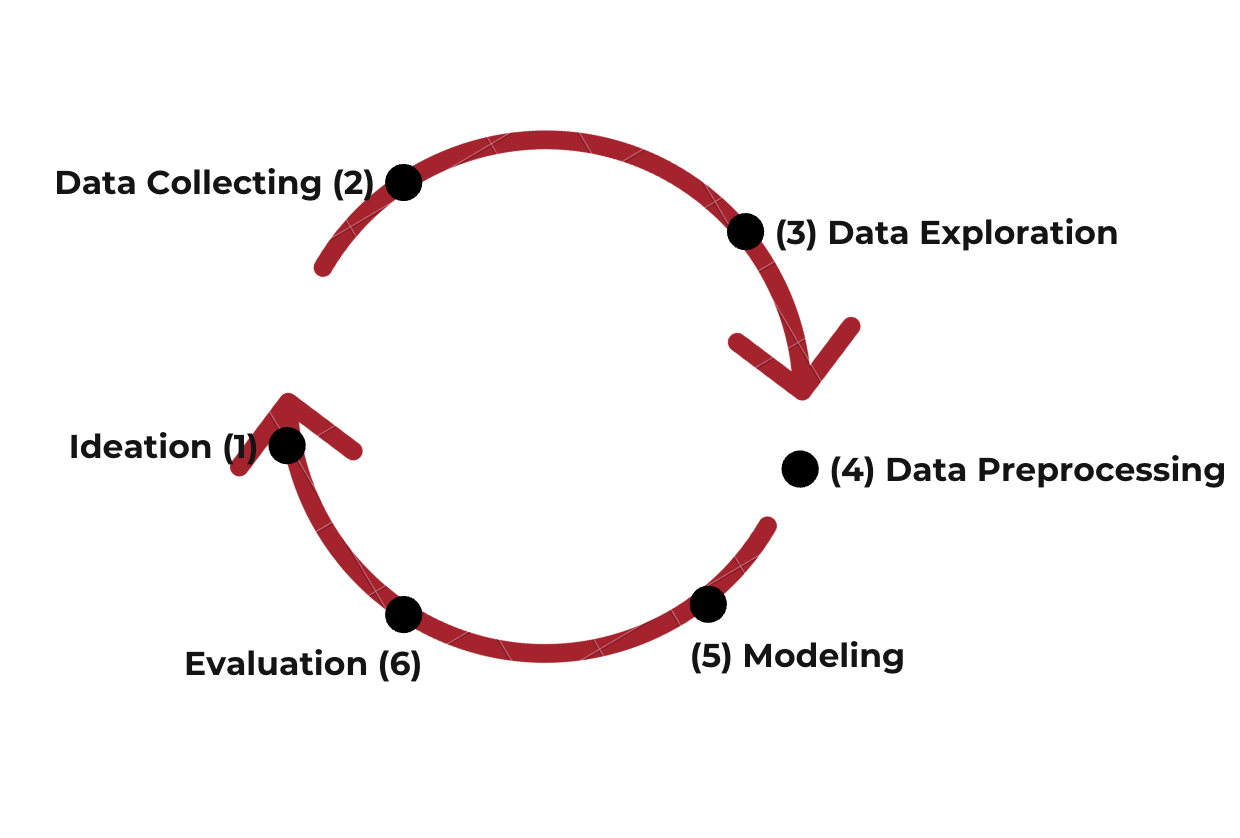

## #1.2 ML

### #1.2.1 Menginstall Library

In [309]:
# 1. Memuat Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [310]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [311]:
# 2. Menginstall Library

!pip install pandas numpy matplotlib seaborn plotly # Menginstall pandas, numpy, matplotlib, seaborn, plotly
!pip install statsmodels prophet # Menginstall library analisis time series
!pip install tensorflow # Menginstall library framework untuk deep learning
!pip install streamlit # Menginstall library untuk mengubah skrip menjadi web interaktif
!pip install scikit-learn xgboost lightgbm

In [312]:
# 3. Mengimport library untuk analisis time series

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import plot autokorelasi dari pandas
from pandas.plotting import autocorrelation_plot

## import alat pemecah komponen data time series (tren, seasonal, residual)
from statsmodels.tsa.seasonal import seasonal_decompose

## import untuk menyembunyikan warning
import warnings
warnings.filterwarnings("ignore")

## import untuk membaca, menulis, dan memanipulasi objek tanggal dan waktu
from datetime import datetime

In [313]:
# 4. Menseting plot style
plt.style.use("default")
sns.set_palette("husl", 8)

# #2. EXPERIMENTATION

## #2.1 Data Engineering

### #2.1.1 Data Collection

#### #2.1.1.1 Load Data

In [314]:
# Memuat Dataset Dalam Bentuk Dataframe

df_transactions = pd.read_csv("/content/drive/MyDrive/store5.csv")
df_transactions

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.000,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.000,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,1456,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
55567,3000586,2017-08-15,5,POULTRY,241.011,1,47.57
55568,3000587,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,3000588,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,3000589,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


#### #2.1.1.2 Summary Statistic

In [315]:
# Melihat Summary Statistik Dari Dataframe

print("\n Ringkasan Statistik 'df_transactions'")
df_transactions.describe()


 Ringkasan Statistik 'df_transactions'


,id,store_nbr,sales,onpromotion,dcoilwtico
count,5.557200e+04,55572.0,55572.000000,55572.000000,38379.000000
mean,1.501021e+06,5.0,280.580231,2.687864,67.925589
std,8.662894e+05,0.0,652.588149,11.748996,25.666659
min,1.452000e+03,5.0,0.000000,0.000000,26.190000
25%,7.512365e+05,5.0,1.000000,0.000000,46.380000
50%,1.501021e+06,5.0,19.000000,0.000000,53.330000
75%,2.250806e+06,5.0,237.000000,0.000000,95.800000
max,3.000590e+06,5.0,8216.620000,182.000000,110.620000


#### #2.1.1.3 General Information

In [316]:
# 1. Mengecek Informasi Dataframe Secara Umum
# a. Pengecekan Nama Kolom
# b. Pengecekan Jumlah Baris Nonnull
# c. Pengecekan Data Null
# d. Pengecekan dtype
# e. Mengecek Besar Memori yang Digunakan

print("\nInformasi Dataframe 'df_transactions'")
print(df_transactions.info())


Informasi Dataframe 'df_transactions'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB
None


In [317]:
# 2. Menunjukan Informasi
# a. Jumlah Baris
print(f"Jumlah baris dataframe: {len(df_transactions)}")

# b. Jumlah Kolom
print(f"Jumlah kolom dataframe: {len(df_transactions.columns)}")

# c. Nama-nama Kolom
print(f"\nNama kolom dataframe: {list(df_transactions.columns)}")

# d. Menghitung Jumlah Data Unik Dari Kolom 'Date'
tanggal_unik = df_transactions["date"].nunique()
print(f"\nJumlah Tanggal Unik Dari Kolom 'date': {tanggal_unik}")

Jumlah baris dataframe: 55572
Jumlah kolom dataframe: 7

Nama kolom dataframe: ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico']

Jumlah Tanggal Unik Dari Kolom 'date': 1684


In [318]:
# 3. Menghitung Jumlah Store

df_transactions["store_nbr"].value_counts()

,count
store_nbr,
5,55572


In [319]:
# 4. Penanganan Data pada Kolom 'date'

# a. Merubah dtype kolom 'date' ke format datetime
df_transactions["date"] = pd.to_datetime(df_transactions["date"])

# b. Mengecek Tanggal Awal dan Akhir Dataframe
tanggal_awal = df_transactions["date"].min()
tanggal_akhir = df_transactions["date"].max()

print(f"Tanggal Awal: {tanggal_awal.strftime('%Y-%m-%d')}")
print(f"Tanggal Akhir: {tanggal_akhir.strftime('%Y-%m-%d')}")

# c. Mengecek Durasi Pencatatan Dataset
durasi = tanggal_akhir - tanggal_awal
durasi_hari = durasi.days
durasi_tahun = round(durasi_hari / 365, 1)

print(f"\nDurasi Pencatatan Dataset:")
print(f"    - {durasi_hari} hari")
print(f"    - {durasi_tahun} tahun")

# d. Mengurutkan Berdasarkan Tanggal
df_transactions = df_transactions.sort_values("date")

# e. Menetapkan 'date' menjadi Index (menjadikan Kolom 'date' menjadi label utama/kata kunci)
df_transactions = df_transactions.set_index("date")

# f. Pengecekan dan Verifikasi Penaganan kolom 'date'
print(f"\nTipe Index: {type(df_transactions.index)}")
print(f"Nama Index: {df_transactions.index.name}")
print("\nSampel Data:")
print(df_transactions.head())

Tanggal Awal: 2013-01-01
Tanggal Akhir: 2017-08-15

Durasi Pencatatan Dataset:
    - 1687 hari
    - 4.6 tahun

Tipe Index: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Nama Index: date

Sampel Data:
              id  store_nbr                      family  sales  onpromotion  \
date                                                                          
2013-01-01  1452          5                  AUTOMOTIVE    0.0            0   
2013-01-01  1484          5                     SEAFOOD    0.0            0   
2013-01-01  1483          5  SCHOOL AND OFFICE SUPPLIES    0.0            0   
2013-01-01  1482          5                     PRODUCE    0.0            0   
2013-01-01  1481          5              PREPARED FOODS    0.0            0   

            dcoilwtico  
date                    
2013-01-01         NaN  
2013-01-01         NaN  
2013-01-01         NaN  
2013-01-01         NaN  
2013-01-01         NaN  


### #2.1.2 Data Exploration (Exploratory Data Analysis/EDA)

#### #2.1.2.1 Define Target Variable

#### #2.1.2.2 Explore Each Variable

##### #A. Univariate Analysis (Analisis Setiap Kolom)

###### #1. Analisis Kolom 'Sales': Analisa Time-Based

In [320]:
# 1. Penanganan Awal

# a. Menambahkan Kolom 'year' dari index 'date'
df_transactions["year"] = df_transactions.index.year

# b. Menambahkan Kolom 'month' dari Index 'date'
df_transactions["month"] = df_transactions.index.month

# c. Menambahkan Kolom 'day_of_week' dari Index 'date'
df_transactions["day_of_week"] = df_transactions.index.dayofweek

# d. Menambahkan Kolom 'weekend' dari Index 'date'
df_transactions["weekend"] = df_transactions["day_of_week"].isin([5, 6])

# catatan:
## index dimulai dari 0
## maka index hari weekend:
### Sabtu 5
### Minggu 6


In [321]:
# 2. Penanganan Lanjut

# a. Menghitung Total Penjualan Perhari

daily_sales = df_transactions.groupby("date")["sales"].sum()

# b. Menghitung Total Penjualan Perbulan

monthly_sales = df_transactions.groupby(["year", "month"])["sales"].sum()

# c. Menghitung Total Penjualan Pertahun

yearly_sales = df_transactions.groupby("year")["sales"].sum()

Tahunan --- Analisis Kolom 'Sales': Analisa Time-Based

In [322]:
# 3. Analisis Tahunan

# 3.a Rekap Sales Tahunan

print('Total Penjualan Pertahun:')
print('   ')
for year, sales in yearly_sales.items():
  print(f"{year}: ${sales:,.0f}")

Total Penjualan Pertahun:
   
2013: $2,579,358
2014: $3,608,638
2015: $3,518,143
2016: $3,598,269
2017: $2,287,996


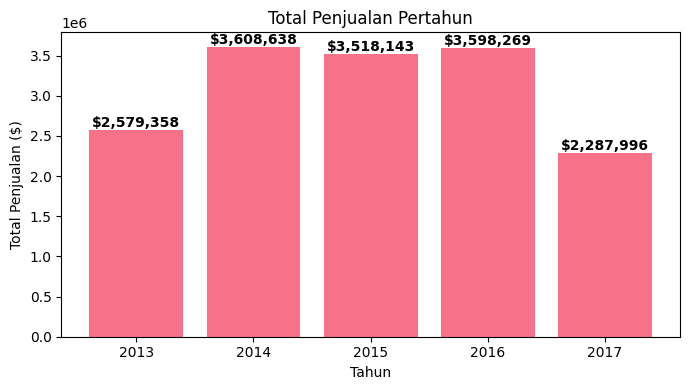

In [323]:
# 3.b Visualisasi Sales Tahunan

plt.figure(figsize=(7,4))
bars = plt.bar(yearly_sales.index, yearly_sales.values)
plt.title('Total Penjualan Pertahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan ($)')
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2., height,
           f'${height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [324]:
# 3.c Analisis Growth Pertahun (%)

print("\nGrowth Pertahun:")
print('  ')
for i in range(1, len(yearly_sales)):
  current_year = yearly_sales.index[i]
  previous_year = yearly_sales.index[i-1]
  growth = ((yearly_sales.iloc[i] - yearly_sales.iloc[i-1] / yearly_sales.iloc[i-1] * 100))

  print(f"-  {current_year}: {growth:+.1f}%")

# catatan:
## i menunjukan index
## index selalu mulai dari 0


Growth Pertahun:
  
-  2014: +3608538.2%
-  2015: +3518043.0%
-  2016: +3598169.0%
-  2017: +2287896.0%


Bulanan --- Analisis Kolom 'Sales': Analisa Time-Based

In [325]:
# 4. Analisis Bulanan

# 4.a Penanganan dataframe montly_sales
## dataframe 'monthly_sales' memiliki index 'year' dan 'month'
## kolom 'year' dan 'month' ingin digabungkan
## penggabungan kolom tersebut untuk menunjukan informasi tahun-bulan-hari yang terbaca sebagai dtype date

monthly_dates = pd.to_datetime(monthly_sales.index.map(lambda x: f"{x[0]}-{x[1]:02d}-01"))
monthly_dates

# penjelasan:
## mengambil index 0 dari x, yaitu kolom 'year'
## mengambil index 1 dari x, yaitu kolom 'month'
## ':02d' format untuk menampilkan angka menjadi dua digit (misal 9 menjadi 09)
## '-01' menunjukan hari, mengasumsikan setiap bulan diwakili oleh tanggal 1


DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01'],
     

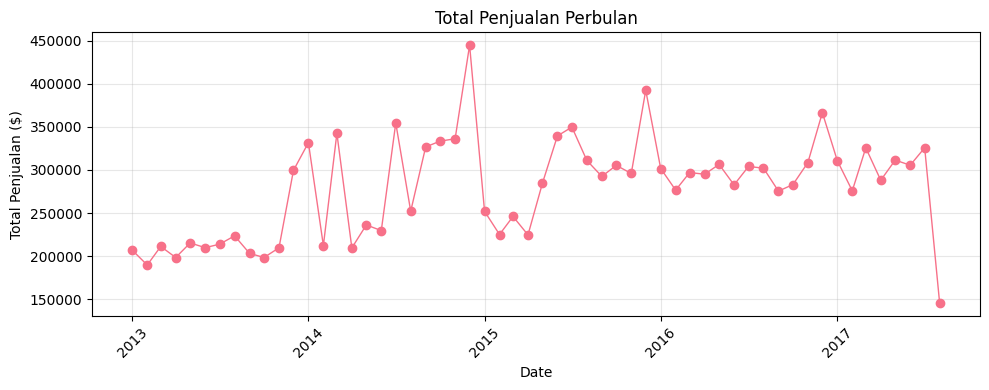

In [326]:
# 4.b Visualisasi Sales Perbulan

plt.figure(figsize=(10,4))
plt.plot(monthly_dates, monthly_sales.values, marker='o', linewidth=1)
plt.title("Total Penjualan Perbulan")
plt.xlabel("Date")
plt.ylabel("Total Penjualan ($)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Harian --- Analisis Kolom 'Sales': Analisa Time-Based

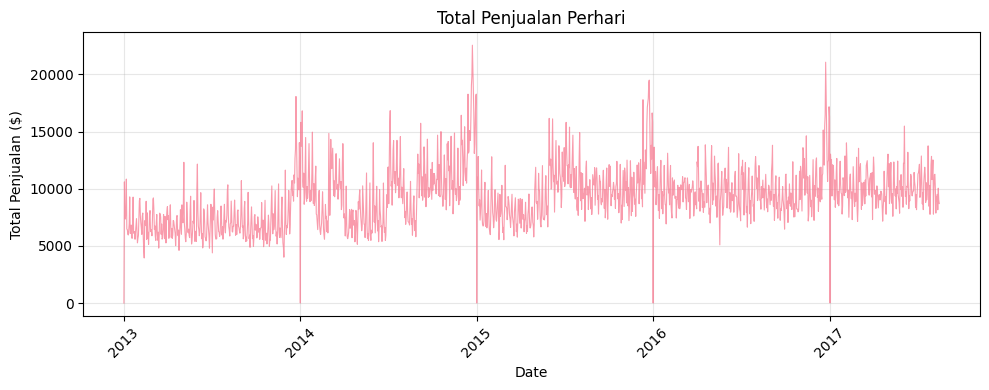

In [327]:
# 5. Analisis Perhari

# 5.a Visualisasi Penjualan Perhari

plt.figure(figsize=(10, 4))
plt.plot(daily_sales.index, daily_sales.values, linewidth=0.8, alpha=0.7)
plt.title("Total Penjualan Perhari")
plt.xlabel("Date")
plt.ylabel("Total Penjualan ($)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

###### #2. Analisis Kolom 'Sales': Analisa Seasonal

In [328]:
# 6. Analisis Pola Tiap Bulan

# 6.a Rata-rata Penjualan Perhari Berdasarkan Bulan

monthly_avg = df_transactions.groupby("month")["sales"].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("Rata-rata Penjualan Perhari Berdasarkan Bulan:")
print("   ")
for month, avg_sales in monthly_avg.items():
  print(f".   {month_names[month-1]}: ${avg_sales:.2f}")

Rata-rata Penjualan Perhari Berdasarkan Bulan:
   
.   Jan: $274.22
.   Feb: $253.45
.   Mar: $278.03
.   Apr: $245.55
.   May: $264.68
.   Jun: $276.13
.   Jul: $302.54
.   Aug: $269.07
.   Sep: $277.20
.   Oct: $273.71
.   Nov: $290.42
.   Dec: $379.45


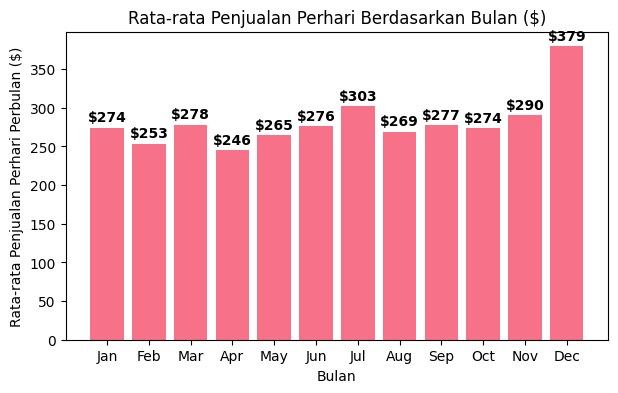

In [329]:
# 6.b Visualisasi Rata-rata Penjualan Perhari Berdasarkan Bulan

plt.figure(figsize=(7, 4))
plt.bar(range(1, 13), monthly_avg.values)
plt.title("Rata-rata Penjualan Perhari Berdasarkan Bulan ($)")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penjualan Perhari Perbulan ($)")
plt.xticks(range(1, 13), [name[:3] for name in month_names])
for i, value in enumerate(monthly_avg.values):
    plt.text(i+1, value + max(monthly_avg.values)*0.01, f'${value:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

In [330]:
# 7. Analisis Pola Harian Dalam 1 Minggu

dow_avg = df_transactions.groupby('day_of_week')['sales'].mean()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print("\nRata-rata Penjualan Harian Dalam 1 Minggu:")
print("    ")
for dow, avg_sales in dow_avg.items():
  print(f"    {day_names[dow]}: ${avg_sales:.0f}")



Rata-rata Penjualan Harian Dalam 1 Minggu:
    
    Monday: $284
    Tuesday: $254
    Wednesday: $275
    Thursday: $236
    Friday: $265
    Saturday: $309
    Sunday: $340


In [331]:
# 8. Perbandingan Weekdays dan Weekend

# 8.a Perhitungan Rata-rata Penjualan Weekdays dan Weekend

weekend_avg = df_transactions[df_transactions["weekend"]]["sales"].mean()
weekday_avg = df_transactions[~df_transactions["weekend"]]["sales"].mean()

print(f"\nRata-rata Penjualan Weekend: ${weekend_avg: .0f}")
print(f"\nRata-rata Penjualan Weekdays: ${weekday_avg: .0f}")
print(f"\nRasio Perbanding Penjualan Weekend vs Weekday: {weekend_avg/weekday_avg: .2f}")


Rata-rata Penjualan Weekend: $ 325

Rata-rata Penjualan Weekdays: $ 263

Rasio Perbanding Penjualan Weekend vs Weekday:  1.23


In [332]:
weekday_avg

np.float64(262.96908230627474)

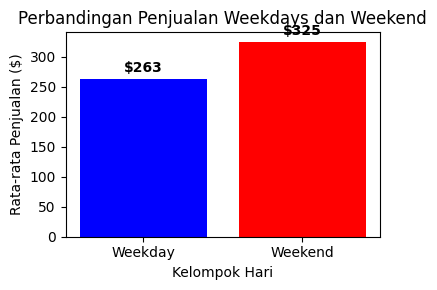

In [333]:
# 8.b Visualisasi Rata-rata Penjualan Weekdays dan Weekend

plt.figure(figsize=(4,3))
plt.bar(["Weekday", "Weekend"], [weekday_avg, weekend_avg], color=['blue','red'])
plt.title("Perbandingan Penjualan Weekdays dan Weekend")
plt.xlabel("Kelompok Hari")
plt.ylabel("Rata-rata Penjualan ($)")

values = [weekday_avg, weekend_avg]
for i, value in enumerate(values): # Corrected loop
  plt.text(i, value + max(values)*0.02, f'${value:,.0f}',
           ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

###### #3. Analisis Kolom 'family': Analisa Kategori Produk

In [334]:
# 1. Analisis Kategori Produk

# 1.a Mencari Data Agregasi Dari 'sales' Dari Kategori Produk Pada Kolom 'Family'
category_stats = df_transactions.groupby("family").agg({
    "sales": ["sum", "mean", "count"]
}).round(2)

# 1.b Mengganti Nama Kolom

category_stats.columns = ["Total_Penjualan", "Rata-rata Penjualan", "Jumlah_Transaksi"]
category_stats = category_stats.sort_values('Total_Penjualan', ascending=False)

# 1.c Mencetak Data 10 Kategori Dengan Penjualan Terbanyak

print(f"Jumlah Kategori Produk: {len(category_stats)}")
print("  ")
print("\n10 Kategori Produk dengan Penjualan Terbanyak:")
for i, (category, row) in enumerate(category_stats.head(10). iterrows(), 1):
  print(f"   {i:2d}. {category}: ${row["Total_Penjualan"]:,.0f}")


# 1.d Mencetak Data 5 Kategori Dengan Penjualan Terendah
print("\n5 Kategori Produk dengan Penjualan Terendah:")
for i, (category, row) in enumerate(category_stats.tail(5).iterrows(), 1):
  print(f"   {i:2d}. {category}: ${row["Total_Penjualan"]:,.0f}")


Jumlah Kategori Produk: 33
  

10 Kategori Produk dengan Penjualan Terbanyak:
    1. GROCERY I: $5,262,682
    2. BEVERAGES: $2,533,831
    3. CLEANING: $1,667,748
    4. PRODUCE: $1,653,582
    5. DAIRY: $871,283
    6. BREAD/BAKERY: $642,855
    7. MEATS: $477,104
    8. PERSONAL CARE: $450,166
    9. POULTRY: $419,630
   10. DELI: $415,271

5 Kategori Produk dengan Penjualan Terendah:
    1. HARDWARE: $1,725
    2. HOME APPLIANCES: $926
    3. SCHOOL AND OFFICE SUPPLIES: $813
    4. BOOKS: $230
    5. BABY CARE: $215


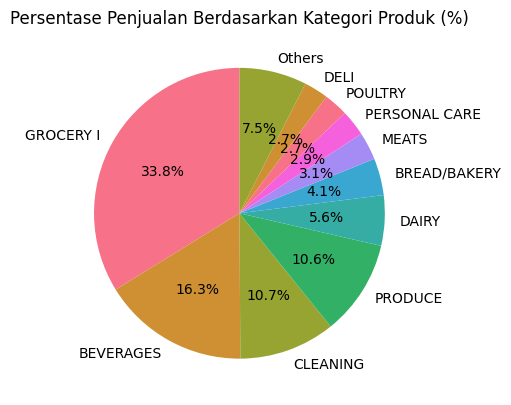

In [335]:
# 2. Visualisasi Persentasi Penjualan Berdasarkan Kategori Produk (%)

# 2.a Pengolahan Awal
#     Menghitung Penjualan Total Tiap Kategori
total_penjualan = category_stats["Total_Penjualan"].sum()
# Calculate the percentage contribution of each category
category_stats["Percentage_Contribution"] = (category_stats["Total_Penjualan"] / total_penjualan * 100).round(1)

#    Memilih 10 Kategori Produk dengan Penjualan Terbanyak

top_10 = category_stats.head(10)

# 2.b Visualisasi Dalam Bentuk Piechart

plt.figure(figsize=(5, 5))
top_10_percentages = top_10["Percentage_Contribution"]
others_percentage = 100 - top_10_percentages.sum()

pie_data = list(top_10_percentages.values) + [others_percentage]
pie_labels = list(top_10.index) + ["Others"]

plt.pie(pie_data, labels=pie_labels, autopct="%1.1f%%", startangle=90)
plt.title("Persentase Penjualan Berdasarkan Kategori Produk (%)")

plt.tight_layout()
plt.show()

###### #4. Analisis Kolom 'onpromotion'

In [336]:
df_transactions.tail(200)

,id,store_nbr,family,sales,onpromotion,dcoilwtico,year,month,day_of_week,weekend
date,,,,,,,,,,
2017-08-09,2989880,5,HARDWARE,4.000,0,49.59,2017,8,2,False
2017-08-09,2989873,5,CLEANING,687.000,11,49.59,2017,8,2,False
2017-08-10,2991666,5,HOME CARE,163.000,7,48.54,2017,8,3,False
2017-08-10,2991667,5,LADIESWEAR,8.000,0,48.54,2017,8,3,False
2017-08-10,2991668,5,LAWN AND GARDEN,6.000,0,48.54,2017,8,3,False
...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3000569,5,FROZEN FOODS,49.465,0,47.57,2017,8,1,False
2017-08-15,3000570,5,GROCERY I,2696.000,26,47.57,2017,8,1,False
2017-08-15,3000571,5,GROCERY II,21.000,0,47.57,2017,8,1,False


In [337]:
# 1.a Analisis Perbandingan Produk Promosi dengan Non-Promosi

#   Menghitung Rata-rata dan Jumlah dari Penjualan
#   Dikategorikan Berdasarkan Kolom 'onpromotion'

promo_summary = df_transactions[df_transactions["onpromotion"].isin([0, 1])].groupby("onpromotion")["sales"].agg(["count", "mean", "sum"]).round(2)

#   Pengelompokan dikodekan dengan 0 dan 1
#   Perlu meilihat dataset untuk representasi/penggantian nama kolom yang sesuai
#   "No Promotion" lebih banyak dibanding "On Promotion"
#   Setelah memanggil dataframe 'promo_summary' ringkasan statistik index 0 > index 1
#   Bisa disimpulkan bahwa index 0 = "No Promotion", 1 = "On Promotion"

#   Mengganti Nama Index dari Dataframe 'promo_summary'
promo_summary.index = ["No Promotion", "On Promotion"]

#   Mencetak Data Perbandingan Produk Promosi dengan Non-Promosi
print("Ringakasan Statistik Kolom 'onpromotion'")
print("   ")
print(promo_summary)

Ringakasan Statistik Kolom 'onpromotion'
   
              count    mean         sum
No Promotion  42357  137.75  5834574.16
On Promotion   3908  270.05  1055354.39


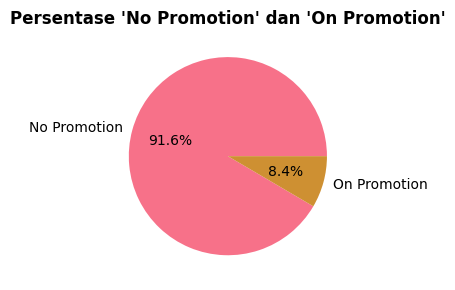

In [338]:
# 1.b Visualisasi Persentase 'No Promotion' dan 'On Promotion'

plt.figure(figsize=(4, 3))
plt.pie(promo_summary["count"], labels=["No Promotion", "On Promotion"], autopct="%1.1f%%")
plt.title("Persentase 'No Promotion' dan 'On Promotion'", fontweight='bold')

plt.tight_layout()
plt.show()

In [339]:
# 2. Analisis Total Promosi dan Total Penjualan Untuk Masing-masing Kategori di Kolom 'family'

# 2.a Membuat Dataframe yang berisi family, total penjualan, dan total promosi
promo_sales_summary = df_transactions.groupby('family').agg(
    total_onpromotion=('onpromotion', 'sum'),
    total_sales=('sales', 'sum')
)

# 2.b Membuat kolom baru untuk rasio promosi terhadap penjualan

promo_sales_summary['promo_to_sales_ratio'] = (promo_sales_summary['total_onpromotion']) / (promo_sales_summary['total_sales']) * 100

# 2.c Mengurutkan hasilnya berdasarkan rasio tertinggi

promo_sales_summary = promo_sales_summary.sort_values(by='promo_to_sales_ratio', ascending=False)

# 2.d Mencetak hasil analisis

print("Total Promosi, Penjualan, dan Rasio Perbandingan Untuk Masing-masing Kategori di Kolom 'family'")
print("   ")
print(promo_sales_summary)

Total Promosi, Penjualan, dan Rasio Perbandingan Untuk Masing-masing Kategori di Kolom 'family'
   
                            total_onpromotion   total_sales  \
family                                                        
SCHOOL AND OFFICE SUPPLIES                 77  8.130000e+02   
SEAFOOD                                   881  2.235899e+04   
LAWN AND GARDEN                           157  4.970000e+03   
HOME AND KITCHEN I                        924  3.010700e+04   
BEAUTY                                    261  8.684000e+03   
DELI                                    12448  4.152710e+05   
EGGS                                     4440  1.908510e+05   
HOME AND KITCHEN II                       690  3.723800e+04   
PRODUCE                                 24483  1.653582e+06   
MEATS                                    6669  4.771044e+05   
HOME CARE                                3335  2.392830e+05   
PET SUPPLIES                               42  3.199000e+03   
DAIRY             

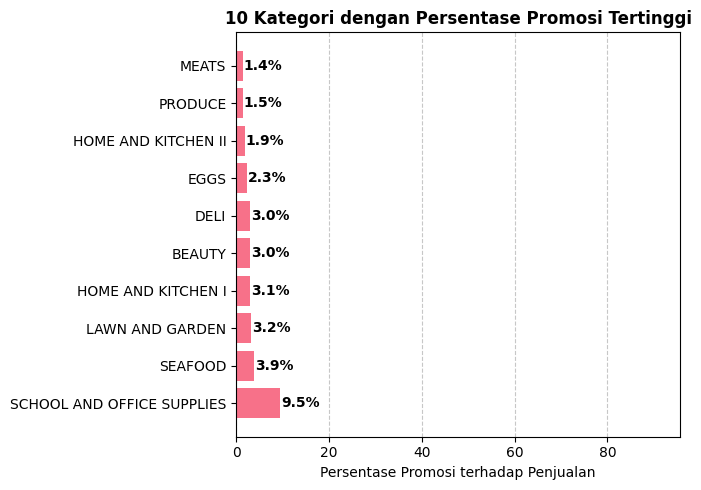

In [340]:
# 3. Visualisasi 10 Kategori dengan Persentase Promosi Tertinggi dengan Bar Horizontal

plt.figure(figsize=(7, 5))
top_10 = promo_sales_summary.head(10)
plt.barh(range(len(top_10)), top_10['promo_to_sales_ratio'])
plt.yticks(range(len(top_10)), top_10.index)
plt.xlabel('Persentase Promosi terhadap Penjualan')
plt.title('10 Kategori dengan Persentase Promosi Tertinggi', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)


# menentukan maksimal skala bar horizontal menjadi maksimal 100%

max_value = top_10['promo_to_sales_ratio'].max()
plt.xlim(0, max_value * 10.1)

# memberi angka di sebelah bar horizontal
for i, value in enumerate(top_10['promo_to_sales_ratio']):
    plt.text(value + max_value*0.02, i, f'{value:.1f}%',
             ha='left', va='center', fontsize=10, fontweight='bold')


plt.tight_layout()
plt.show()




###### #5. Analisis Kolom 'sales': sales ketika nilainya nol (zero sales)

In [341]:
# 1. Menghitung Data Yang Memiliki Sales = $0.00 Pada Kolom 'sales'

# 1.a Menghitung Total Penjualan Keseluruhan

print(f"\nTotal Penjualan Keseluruhan: ${df_transactions['sales'].sum():,.2f}")

# 1.b Menghitung Total Data Penjualan

print(f"\nJumlah Total Penjualan: {len(df_transactions)}")

# 1.c Menghitung Data Yang Memiliki Sales = $0.00

print(f"\nJumlah Penjualan Sama dengan Nol: {len(df_transactions[df_transactions['sales'] == 0])}")

# 1.d Menghitung Dalam Persen Data Yang Memiliki Sales = $0.00

print(f"\nJumlah Penjualan Sama dengan Nol: {(len(df_transactions[df_transactions['sales'] == 0]) / len(df_transactions) * 100):.2f}%")


Total Penjualan Keseluruhan: $15,592,404.57

Jumlah Total Penjualan: 55572

Jumlah Penjualan Sama dengan Nol: 12414

Jumlah Penjualan Sama dengan Nol: 22.34%


In [342]:
# 2. Pola Penjualan = $0.00 Pertahun

# 2.a Menghitung Hari dengan Penjualan = $0.00
zero_sales_by_year = df_transactions[df_transactions["sales"] == 0].groupby(df_transactions[df_transactions["sales"] == 0].index.year).size()

# 2.b Mencetak Data Jumlah Hari Tiap Tahunnya dengan Penjualan = $0.00

print("\nJumlah hari dimana muncul zero sales berdasarkan tahun:")
print(zero_sales_by_year)



Jumlah hari dimana muncul zero sales berdasarkan tahun:
date
2013    4731
2014    2879
2015    2531
2016    1566
2017     707
dtype: int64


In [343]:
# 3. Mencari 5 Kategori Produk yang Memiliki Penjualan = $0.00 Tertinggi

zero_sales_by_category = df_transactions[df_transactions["sales"] == 0].groupby("family").size().sort_values(ascending=False)
top_5_categories = zero_sales_by_category.head().index
print("\nTop 5 kategori dengan zero sales terbanyak:")
print(zero_sales_by_category.head())






Top 5 kategori dengan zero sales terbanyak:
family
BABY CARE                     1562
BOOKS                         1556
SCHOOL AND OFFICE SUPPLIES    1414
HOME APPLIANCES               1061
PET SUPPLIES                   766
dtype: int64


In [344]:
# 4. Top 5 Kategori Produk dengan Penjualan = $0.00 Pertahun (2013-2017)

# 4.a Top 5 Kategori Produk dengan Penjualan = $0.00 Pada Tahun 2013

zero_sales_2013 = df_transactions[(df_transactions["sales"] == 0) & (df_transactions.index.year == 2013)].groupby("family").size().sort_values(ascending=False)
top_5_categories = zero_sales_2013.head().index
print("\nTop 5 Kategori dengan Penjualan = $0.00 Pada Tahun 2013:")
print(zero_sales_2013.head())

# 4.b Top 5 Kategori Produk dengan Penjualan = $0.00 Pada Tahun 2014

zero_sales_2014 = df_transactions[(df_transactions["sales"] == 0) & (df_transactions.index.year == 2014)].groupby("family").size().sort_values(ascending=False)
top_5_categories = zero_sales_2014.head().index
print("\nTop 5 Kategori dengan Penjualan = $0.00 Pada Tahun 2014:")
print(zero_sales_2014.head())

# 4.b Top 5 Kategori Produk dengan Penjualan = $0.00 Pada Tahun 2015

zero_sales_2015 = df_transactions[(df_transactions["sales"] == 0) & (df_transactions.index.year == 2015)].groupby("family").size().sort_values(ascending=False)
top_5_categories = zero_sales_2015.head().index
print("\nTop 5 Kategori dengan Penjualan = $0.00 Pada Tahun 2015:")
print(zero_sales_2015.head())


# Jumlah Penjualan Samadengan Nol pada Tahun 2016 Berdasarkan Ketagori

zero_sales_2016 = df_transactions[(df_transactions["sales"] == 0) & (df_transactions.index.year == 2016)].groupby("family").size().sort_values(ascending=False)
top_5_categories = zero_sales_2016.head().index
print("\nTop 5 Kategori dengan Penjualan = $0.00 Pada Tahun 2016:")
print(zero_sales_2016.head())

# Jumlah Penjualan Samadengan Nol pada Tahun 2017 Berdasarkan Ketagori

zero_sales_2017 = df_transactions[(df_transactions["sales"] == 0) & (df_transactions.index.year == 2017)].groupby("family").size().sort_values(ascending=False)
top_5_categories = zero_sales_2017.head().index
print("\nTop 5 Kategori dengan Penjualan = $0.00 Pada Tahun 2017:")
print(zero_sales_2017.head())


Top 5 Kategori dengan Penjualan = $0.00 Pada Tahun 2013:
family
BABY CARE             364
PET SUPPLIES          364
BOOKS                 364
CELEBRATION           364
HOME AND KITCHEN I    364
dtype: int64

Top 5 Kategori dengan Penjualan = $0.00 Pada Tahun 2014:
family
BABY CARE                     364
BOOKS                         364
SCHOOL AND OFFICE SUPPLIES    273
HOME APPLIANCES               205
MAGAZINES                     190
dtype: int64

Top 5 Kategori dengan Penjualan = $0.00 Pada Tahun 2015:
family
BABY CARE                     364
BOOKS                         364
SCHOOL AND OFFICE SUPPLIES    339
HOME APPLIANCES               222
PET SUPPLIES                  189
dtype: int64

Top 5 Kategori dengan Penjualan = $0.00 Pada Tahun 2016:
family
SCHOOL AND OFFICE SUPPLIES    324
BOOKS                         300
BABY CARE                     292
HOME APPLIANCES               271
HARDWARE                      163
dtype: int64

Top 5 Kategori dengan Penjualan = $0.00 Pada Ta

###### #6. Analisis Kolom 'dcoilwtico': analisa harga bahan bakar

In [345]:
# 1. Missing Value pada Kolom 'dcoilwtico'

# 1.a Menghitung Jumlah Missing Value pada Kolom 'dcoilwtico'

print(f"Jumlah missing values pada kolom 'dcoilwtico': {df_transactions['dcoilwtico'].isnull().sum()}")

# 1.b Menghitung Persentase Jumlah Missing Value pada Kolom 'dcoilwtico'

print(f"Persentase missing values pada kolom 'dcoilwtico': {(df_transactions['dcoilwtico'].isnull().sum() / len(df_transactions)) * 100:.2f}%")

# 1.c Jumlah Missing Value pada Kolom 'dcoilwtico' Tiap Tahun

missing_by_year = df_transactions.groupby(df_transactions.index.year)["dcoilwtico"].apply(lambda x: x.isnull().sum())
print("\nJumlah missing values pada kolom 'dcoilwtico' tiap tahun:")
print(missing_by_year)

Jumlah missing values pada kolom 'dcoilwtico': 17193
Persentase missing values pada kolom 'dcoilwtico': 30.94%

Jumlah missing values pada kolom 'dcoilwtico' tiap tahun:
date
2013    3696
2014    3696
2015    3696
2016    3729
2017    2376
Name: dcoilwtico, dtype: int64


###### #7. Analisis Kolom 'Sales': Kategori 'GROCERY I' - Plot Time Series

In [346]:
# 1. Analisis Kategori 'GROCERY I' pada Kolom 'sales'

# 1.a Mendefinisikan Kategori yang Dipilih

selected_family = "GROCERY I"

# 1.b Mem-filter dataframe untuk Menampilkan Data Kategori di Kolom 'family' == selected_family

df_family = df_transactions[df_transactions["family"] == selected_family].copy()

# 1.c Mencetak Data Yang Diperlukan

print(f"Jumlah Data: {len(df_family)}")
print(f"Tanggal Data Pertama: {df_family.index.min()}")
print(f"Tanggal Data Terakhir: {df_family.index.max()}")
print(f"Rata-rata Penjualan: ${df_family['sales'].mean():.2f}")
print(f"Penjualan Tertinggi: ${df_family['sales'].max():.2f}")
print(f"Penjualan Terendah: ${df_family['sales'].min():.2f}")



Jumlah Data: 1684
Tanggal Data Pertama: 2013-01-01 00:00:00
Tanggal Data Terakhir: 2017-08-15 00:00:00
Rata-rata Penjualan: $3125.11
Penjualan Tertinggi: $7656.00
Penjualan Terendah: $0.00


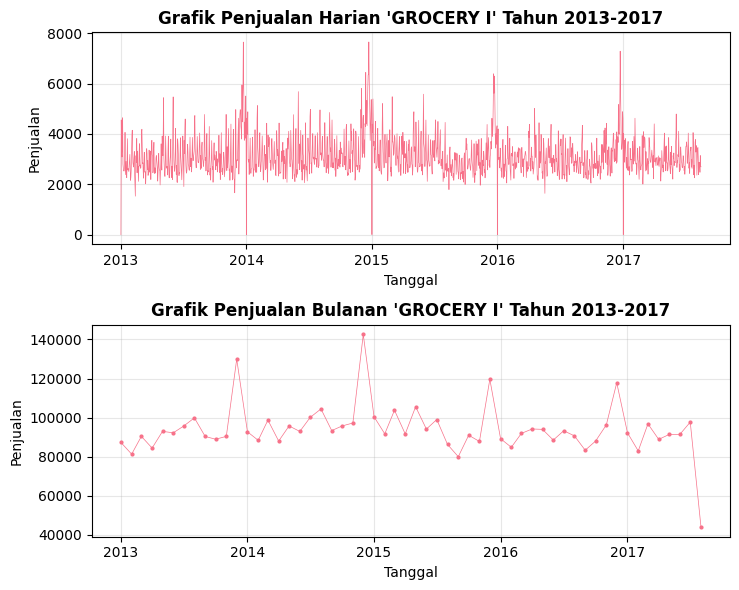

In [347]:
# 2. Visualisasi Data Penjualan Perhari untuk Kategori 'GROCERY I' Menggunakan Subplot

# 2.a Mendefinisikan Kanvas dan Ukuran Figur

fig, axes = plt.subplots(2, 1, figsize=(7.5, 6))

# 2.b Visualisasi Data Penjualan Perhari untuk Kategori 'GROCERY I'

axes[0].plot(df_family.index, df_family["sales"], linewidth=0.5)
axes[0].set_title(f"Grafik Penjualan Harian '{selected_family}' Tahun 2013-2017", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Tanggal")
axes[0].set_ylabel("Penjualan")
axes[0].grid(True, alpha=0.3)

# 2.b Visualisasi Data Penjualan Perbulan untuk Kategori 'GROCERY I'

# 2.b1 Membuat Kolom 'month' dan 'year' Terpisah dari Index
df_family["month"] = df_family.index.month
df_family["year"] = df_family.index.year
monthly_sales = df_family.groupby(["year", "month"])["sales"].sum()


# 2.b2 Meng-convert MultiIndex ke DatetimeIndex untuk Plotting
# Convert the MultiIndex to a DatetimeIndex for plotting
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f"{x[0]}-{x[1]:02d}-01"))

# index x[0]: tahun
# index x[1]: bulan
# 01: default tanggal yang ditentukan

axes[1].plot(monthly_sales.index, monthly_sales.values, linewidth=0.5, marker='o', markersize='2')
axes[1].set_title(f"Grafik Penjualan Bulanan '{selected_family}' Tahun 2013-2017", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Tanggal")
axes[1].set_ylabel("Penjualan")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


###### #8. Analisis Kolom 'Sales': Kategori 'GROCERY I' - Trend & Seasonality

###### #8.a Moving Average (MA)

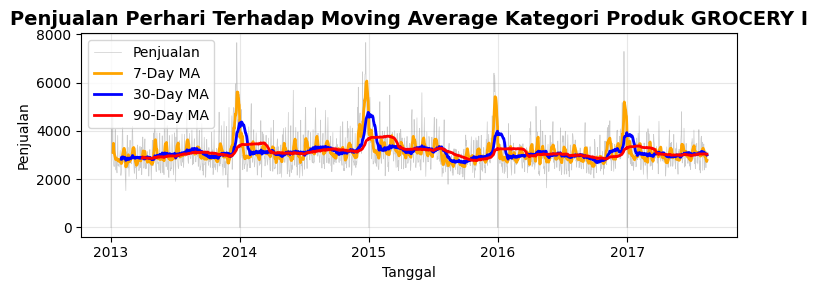

In [348]:
# 1. Moving Average untuk Kategori 'GROCERY I'

# 1.a Mendefinisikan Moving Average
# MA 7 Hari
# MA 30 Hari
# MA 90 Hari
df_family["MA_7"] = df_family["sales"].rolling(window=7).mean()
df_family["MA_30"] = df_family["sales"].rolling(window=30).mean()
df_family["MA_90"] = df_family["sales"].rolling(window=90).mean()

# 1.b Visualisasi Moving Average
plt.figure(figsize=(7.5, 3))
plt.plot(df_family.index, df_family["sales"], label="Penjualan", linewidth=0.5, alpha=0.4, color="gray")
plt.plot(df_family.index, df_family["MA_7"], label="7-Day MA", linewidth=2, color="orange")
plt.plot(df_family.index, df_family["MA_30"], label="30-Day MA", linewidth=2, color="blue")
plt.plot(df_family.index, df_family["MA_90"], label="90-Day MA", linewidth=2, color="red")

plt.title(f"Penjualan Perhari Terhadap Moving Average Kategori Produk {selected_family}", fontsize=14, fontweight="bold")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.legend(loc="best")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



###### #8.b Seasonal Decomposition


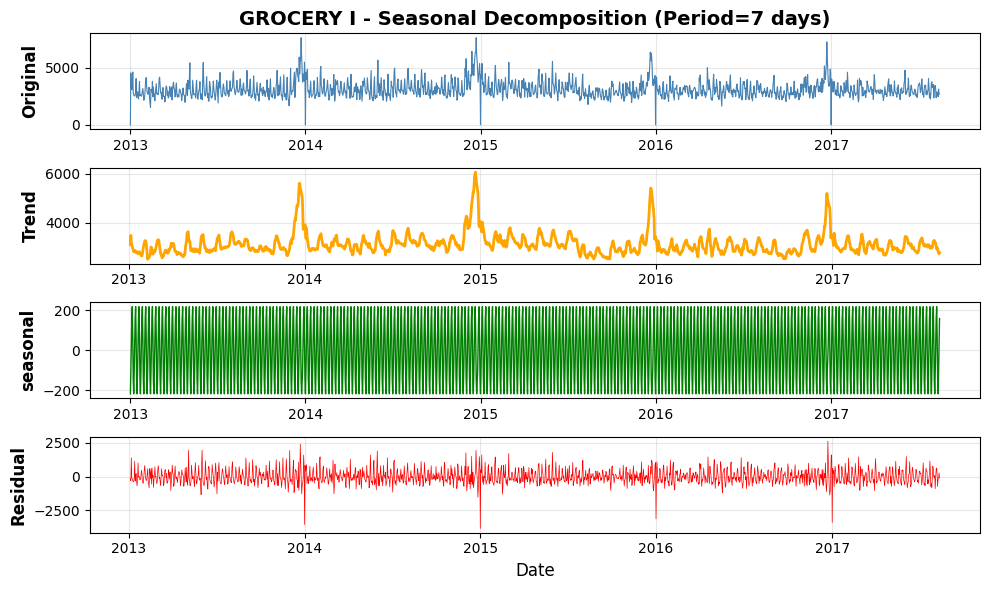

In [349]:
# 1. Analisis Dekomposisi

# 1.a Menjalankan Analisis Dekomposisi Pada Dataframe 'df_family' dan kolom 'sales'
#   Menggunakan pola 'aditive' dengan asumsi Original = Trend + Seasonal + Residual
#   Menggunakan pola musimal (seasonal) yang berulang setiap 7 titik data/pola mingguan

decomposition = seasonal_decompose(df_family["sales"], model="additive", period=7)

# 1.b Menyiapkan Kanvas Plot
fig, axes = plt.subplots(4, 1, figsize=(10, 6))

# 1.c Melakukan Visualisasi Komponen 'Original'
axes[0].plot(df_family.index, df_family["sales"], color="steelblue", linewidth=0.8)
axes[0].set_ylabel("Original", fontsize=12, fontweight="bold")
axes[0].set_title(f"{selected_family} - Seasonal Decomposition (Period=7 days)", fontsize=14, fontweight="bold")
axes[0].grid(True, alpha=0.3)

# 1.d Melakukan Visualisasi Komponen 'Trend'
axes[1].plot(decomposition.trend.index, decomposition.trend, color="orange", linewidth=2)
axes[1].set_ylabel("Trend", fontsize=12, fontweight="bold")
axes[1].grid(True, alpha=0.3)

# 1.e Melakukan Visualisasi Komponen 'Seasonal'
axes[2].plot(decomposition.seasonal.index, decomposition.seasonal, color="green", linewidth=1)
axes[2].set_ylabel("seasonal", fontsize=12, fontweight="bold")
axes[2].grid(True, alpha=0.3)

# 1.f Melakukan Visualisasi Komponen 'Residual'
axes[3].plot(decomposition.resid.index, decomposition.resid, color="red", linewidth=0.5)
axes[3].set_ylabel("Residual", fontsize=12, fontweight="bold")
axes[3].set_xlabel("Date", fontsize=12)
axes[3].grid(True, alpha=0.3)

# 1.g Menampilkan Visual Data
plt.tight_layout()
plt.show()


###### #8.c Box Plot Yearly

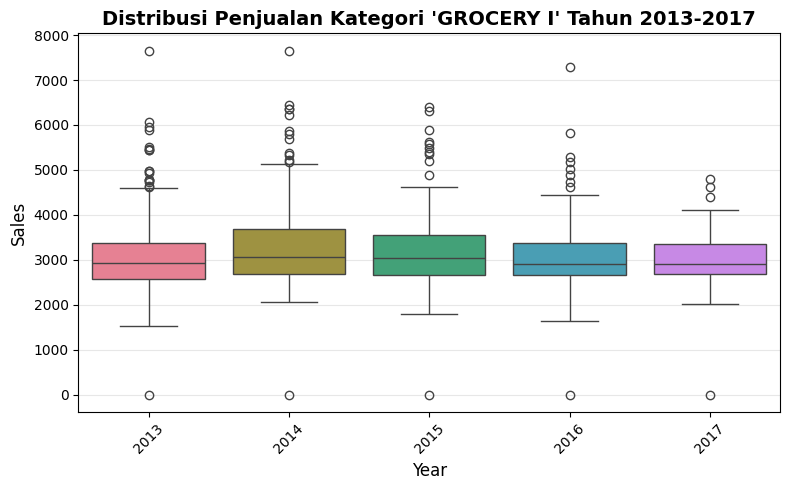

In [350]:
# 1. Boxplot Data Kolom 'sales' Kategori 'GROCERY I' Tahun 2013-2017

# 1.a Menentukan Ukuran Kanvas
plt.figure(figsize=(8, 5))

# 1.b Melakukan Visualisasi
sns.boxplot(data=df_family, x=df_family.index.year, y="sales", palette="husl")
plt.title(f"Distribusi Penjualan Kategori '{selected_family}' Tahun 2013-2017", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")

# 1.c Menampilkan Visual Data
plt.tight_layout()
plt.show()


###### #8.d Box Plot Monthly

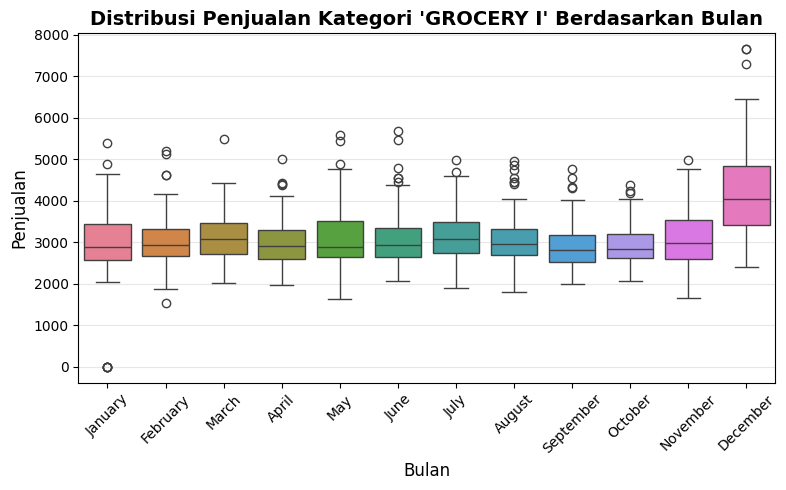

In [351]:
# 1. Boxplot Data Kolom 'sales' Kategori 'GROCERY I' Perbulan pada Tahun 2013-2017

# 1.a Menambah Kolom 'month'

df_family["month"] = df_family.index.month
df_family["month_name"] = df_family.index.month_name()

# 1.b Menyiapkan Kanvas Plot
plt.figure(figsize=(8, 5))

# 1.c Menjalankan Fungsi Boxplot
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
sns.boxplot(data=df_family, x="month_name", y="sales", order=month_order, palette="husl")
plt.title(f"Distribusi Penjualan Kategori '{selected_family}' Berdasarkan Bulan", fontsize=14, fontweight="bold")
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Penjualan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")

# 1.d Menampilkan Visual Data
plt.tight_layout()
plt.show()

###### #8.d Box Plot Weekly

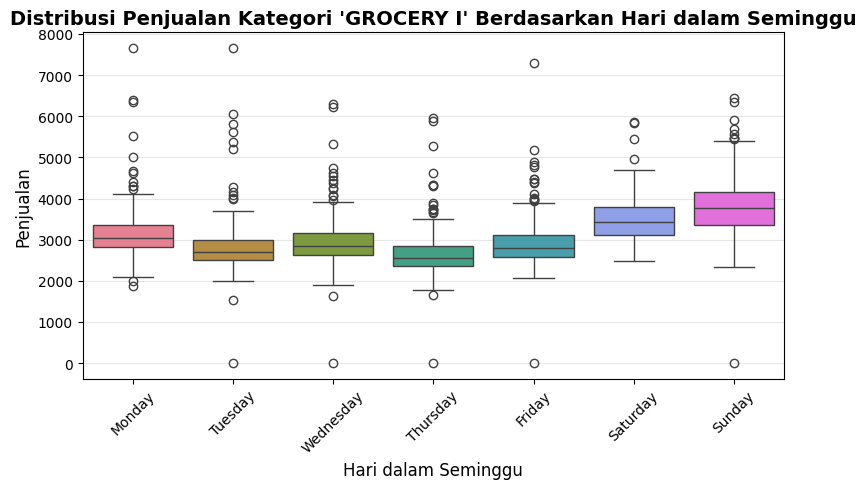

In [352]:
# 1. Boxplot Data Kolom 'sales' Kategori 'GROCERY I' Berdasarkan Hari dalam Seminggu

# 1.a Menambah Kolom 'day_of_week'
df_family["day_of_week"] = df_family.index.dayofweek
df_family["day_name"] = df_family.index.day_name()

# 1.b Menyiapkan Kanvas Plot
plt.figure(figsize=(8, 5))

# 1.c Menjalankan Fungsi Boxplot
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.boxplot(data=df_family, x="day_name", y="sales", order=day_order, palette="husl")
plt.title(f"Distribusi Penjualan Kategori '{selected_family}' Berdasarkan Hari dalam Seminggu", fontsize=14, fontweight="bold")
plt.xlabel("Hari dalam Seminggu", fontsize=12)
plt.ylabel("Penjualan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")

# 1.d Menampilkan Visual Data
plt.tight_layout()
plt.show()

###### #8.e Rata-rata Penjualan

In [353]:
# 1. Rata-rata Penjualan Harian

# 1.a Menghitung Rata-rata Penjualan Harian
avg_by_day = df_family.groupby("day_name")["sales"].mean().reindex(day_order)

# 1.b Mencetak Hasil Perhitungan
print("\nRata-rata Penjualan Berdasarkan Hari dalam Seminggu")
for day, avg in avg_by_day.items():
  print(f"{day:12s}: ${avg:8.2f}")


Rata-rata Penjualan Berdasarkan Hari dalam Seminggu
Monday      : $ 3166.80
Tuesday     : $ 2838.49
Wednesday   : $ 2953.65
Thursday    : $ 2669.73
Friday      : $ 2922.56
Saturday    : $ 3495.77
Sunday      : $ 3829.42


In [354]:
# 2. Rata-rata Penjualan Bulanan

# 2.a Menghitung Rata-rata Penjualan Bulanan
avg_by_month = df_family.groupby("month_name")["sales"].mean().reindex(month_order)

# 2.b Mencetak Hasil Perhitungan
print("\nRata-rata Penjualan Berdasarkan Bulan:")
for month, avg in avg_by_month.items():
  print(f"{month:12s}: ${avg:8.2f}")


Rata-rata Penjualan Berdasarkan Bulan:
January     : $ 2980.53
February    : $ 3044.35
March       : $ 3107.70
April       : $ 2981.37
May         : $ 3094.70
June        : $ 3061.77
July        : $ 3134.45
August      : $ 3059.71
September   : $ 2892.53
October     : $ 2933.23
November    : $ 3098.16
December    : $ 4248.88


##### #B. Multivariare Analysis (Analisis Hubungan Antar Kolom)

###### #1. Analisis Kolom 'sales' vs 'dcoilwtico': Analisa Hubungan 'Sales' terhadap 'Harga Minyak/Bahan Bakar'

In [355]:
# 1. Mencetak Data Ringkasan Statistik Kolom 'dcoilwtico'
print("Rincian Statistik Kolom 'dcoilwtico':")
print(" ")
print(df_transactions['dcoilwtico'].describe())

Rincian Statistik Kolom 'dcoilwtico':
 
count    38379.000000
mean        67.925589
std         25.666659
min         26.190000
25%         46.380000
50%         53.330000
75%         95.800000
max        110.620000
Name: dcoilwtico, dtype: float64



Korelasi 'sales' terhadap 'dcoilwtico': -0.419


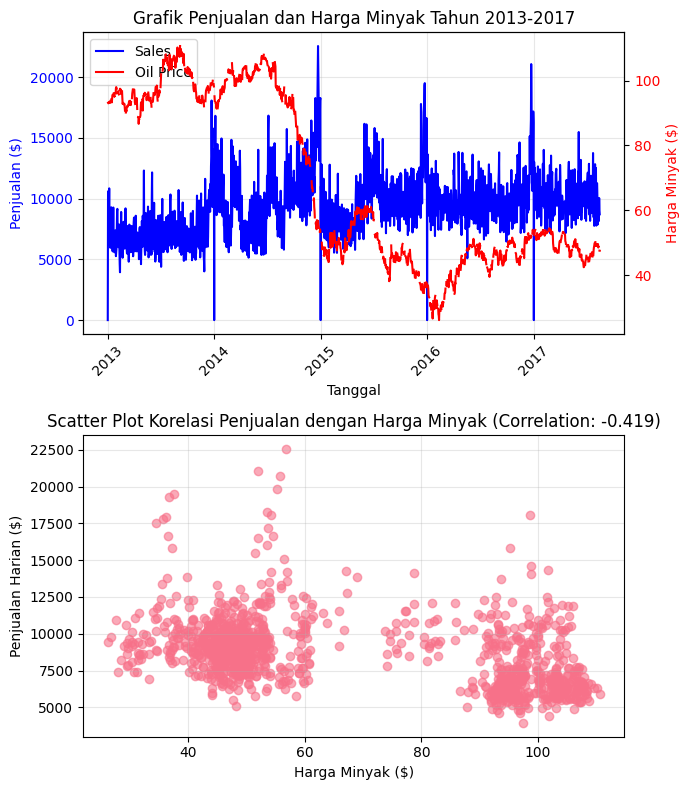

In [356]:
# 2. Menghitung Hubungan/Korelasi Antara Kolom 'sales' dan 'dcoilwtico'

# 2.a Melakukan Agregasi (Meringkas) Data dari Kolom 'sales' dan 'dcoilwtico'

daily_data = df_transactions.groupby("date").agg({
    "sales": "sum",
    "dcoilwtico": "mean"
}).reset_index()

# 2.b Melakukan Perhitungan Korelasi
correlation = daily_data["sales"].corr(daily_data["dcoilwtico"])
print(f"\nKorelasi 'sales' terhadap 'dcoilwtico': {correlation:.3f}")

# 2.c Membuat Kanvas Plot
fig, axes = plt.subplots(2, 1, figsize=(7, 8))

# 2.d Visual Gabungan Penjualan dan Harga Minyak

#     Medefinisikan ax1 sebagai axis index ke 0
#     Menentukan ax1 (sumbu y-kiri) yang akan digunakan sebagai sumbu 'sales'
ax1 = axes[0] # Ambil area plot pertama dari 'axes'

#     Menentukan ax2 (sumbu y-kanan) yang akan digunakan sebagai sumbu 'dcoilwtico'
ax2 = ax1.twinx()


#     Visualisasi 'sales' di ax1 (biru)
line1 = ax1.plot(daily_data["date"], daily_data["sales"], color='b', label='Sales')
ax1.set_xlabel("Tanggal")
ax1.set_ylabel("Penjualan ($)", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.tick_params(axis='x', rotation=45) # Rotasi label tanggal di sumbu X
ax1.grid(True, alpha=0.3)

#     Visualisasi 'dcoilwtico' di ax2 (merah)
line2 = ax2.plot(daily_data["date"], daily_data["dcoilwtico"], color='r', label='Oil Price')
ax2.set_ylabel("Harga Minyak ($)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

#     Menentukan Judul Grafik
ax1.set_title("Grafik Penjualan dan Harga Minyak Tahun 2013-2017")

#     Menggabungkan Legenda dari Kedua Sumbu Y
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 2.e Visual Scatter Plot Korelasi 'sales' dengan 'dcoilwtico'

#     Medefinisikan ax_scatter sebagai axis index ke 1
ax_scatter = axes[1]

#     Visualisasi Korelasi dengan Scatter Plot
ax_scatter.scatter(daily_data["dcoilwtico"], daily_data["sales"], alpha=0.6)
ax_scatter.set_title(f"Scatter Plot Korelasi Penjualan dengan Harga Minyak (Correlation: {correlation:.3f})")
ax_scatter.set_xlabel("Harga Minyak ($)")
ax_scatter.set_ylabel("Penjualan Harian ($)")
ax_scatter.grid(True, alpha=0.3)

# 2.f Menampilkan Visual Data
plt.tight_layout()
plt.show()

###### #2. Analisis Kolom 'sales' vs 'onpromotion': Analisa Hubungan Kolom 'sales' terhadap Kolom 'onpromotion' dan 'dcoilwtico'

In [357]:
# 1. Menghitung Hubungan/Korelasi Antara Kolom 'sales', 'promotion', dan 'dcoilwtico'

# 1.a Melakukan Agregasi (Meringkas) Data dari Kolom 'sales', 'onpromotion', dan 'dcoilwtico'
daily_data = df_transactions.groupby("date").agg({
    "sales": "sum",
    "onpromotion": "sum",
    "dcoilwtico": "mean"
}).reset_index()

# 1.b Menghitung Korelasi
correlation_matrix = daily_data[["sales", "onpromotion", "dcoilwtico"]].corr()

# 1.c Mencetak Hasil Hitungan Korelasi
print("\nMatriks Korelasi Anatara 'sales', 'onpromotion', dan 'dcoilwtico':")
print(" ")
print(correlation_matrix)


Matriks Korelasi Anatara 'sales', 'onpromotion', dan 'dcoilwtico':
 
                sales  onpromotion  dcoilwtico
sales        1.000000     0.321797   -0.419058
onpromotion  0.321797     1.000000   -0.588518
dcoilwtico  -0.419058    -0.588518    1.000000


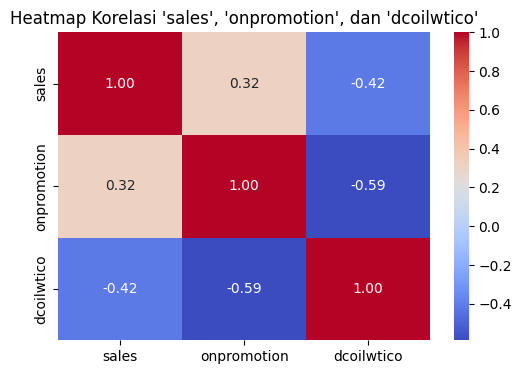

In [358]:
# 1.d Visualisasi Data Heatmap Korelasi

#   Menentukan Kanvas
plt.figure(figsize=(6, 4))

#   Visualisasi Korelasi dengan Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi 'sales', 'onpromotion', dan 'dcoilwtico'")

#   Menampilkan Visual Data
plt.show()

##### #C. Analisis Kualitas Data

###### #1. Mengecek Data Hilang (Missing Values)

In [359]:
# 1. Mengecek Data Hilang (Missing Values)

# 1.a Mendefinisikan Fungsi Yang Mengecek dan Menghitung Apabila Terdapat Missing Value
print("\nRincian Data Hilang Perkolom")
print(" ")
missing_values = df_transactions.isnull().sum()
missing_percentage = missing_values / len(df_transactions) * 100

for col in df_transactions.columns:
  if missing_values[col] > 0:
    print(f" - {col}: {missing_values[col]} Data Hilang ({missing_percentage[col]:.1f}%)")
  else:
    print(f" - {col}: Tidak Ada Data Hilang")



Rincian Data Hilang Perkolom
 
 - id: Tidak Ada Data Hilang
 - store_nbr: Tidak Ada Data Hilang
 - family: Tidak Ada Data Hilang
 - sales: Tidak Ada Data Hilang
 - onpromotion: Tidak Ada Data Hilang
 - dcoilwtico: 17193 Data Hilang (30.9%)
 - year: Tidak Ada Data Hilang
 - month: Tidak Ada Data Hilang
 - day_of_week: Tidak Ada Data Hilang
 - weekend: Tidak Ada Data Hilang


###### #2. Mengecek Data Duplikat (Duplicates)

In [360]:
# 1. Mengecek Data Duplikat

duplicate_rows = df_transactions.duplicated().sum()
print(f"\nJumlah Data Duplikat: {duplicate_rows}")

print(f"\nKesimpulan: ditemukan {duplicate_rows} data duplikat")


Jumlah Data Duplikat: 0

Kesimpulan: ditemukan 0 data duplikat


-----------------------------------

###### #3. Mengecek Pencilan (Outliers)

In [361]:
# 1.a Mendefinisikan Metode IQR sebagai Pendekatan Pengecekan Outlier

def detect_outliers_iqr(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
  return outliers, lower_bound, upper_bound

# 1.b Menjalankan Metode IQR pada Dataframe Untuk Mengecek Outlier

outliers, lower, upper = detect_outliers_iqr(df_transactions, "sales")
n_outliers = outliers.sum()

# 1.c Mendefinisikan Rentang Data Normal Sesuai Perhitungan Q1 dan Q3
print("Hasil Pengecekan Outlier Berdasarkan Perhitungan IQR:")
print("  ")
print(f" - Data Dianggap Normal Apabila Termasuk Dalam Rentang: ${lower:.2f} sampai dengan ${upper:.2f}")

# 1.d Mencetak Data Jumlah Outlier yang Terdeteksi dari Keseluruhan Data
print(f" - Jumlah Outlier Terdeteksi: {n_outliers} dari {len(df_transactions)}")
print(f" - Persentase Outlier Terdeteksi: {n_outliers/len(df_transactions) * 100:.2f}%")

# 1.e Mencetak Tabel Jumlah Outlier dan Non Outlier
print("  ")
print(f"\nRincian Jumlah Outlier dan Non Outlier:")
print(" ")
df_transactions["is_outlier"] = np.where(outliers, "Outlier", "Non Outlier")
print(df_transactions["is_outlier"].value_counts())

Hasil Pengecekan Outlier Berdasarkan Perhitungan IQR:
  
 - Data Dianggap Normal Apabila Termasuk Dalam Rentang: $-353.00 sampai dengan $591.00
 - Jumlah Outlier Terdeteksi: 6551 dari 55572
 - Persentase Outlier Terdeteksi: 11.79%
  

Rincian Jumlah Outlier dan Non Outlier:
 
is_outlier
Non Outlier    49021
Outlier         6551
Name: count, dtype: int64


#### #2.1.2.3 Kesimpulan

In [362]:
# 1. Ringkasan Dataset df_transactions

print("\nRinkasan Dataset:")
print(" ")
print(f"- Time period: {df_transactions.index.min().strftime("%Y-%m-%d")} to {df_transactions.index.max().strftime("%Y-%m-%d")}")
print(f"- Total durasi : {(df_transactions.index.max() - df_transactions.index.min()).days/365:.1f} years")
print(f"- Total records : {len(df_transactions):,}")
print(f"- Kategori produk : {df_transactions["family"].nunique()}")
print(f"- Total revenue: ${df_transactions["sales"].sum():,.0f}")


Rinkasan Dataset:
 
- Time period: 2013-01-01 to 2017-08-15
- Total durasi : 4.6 years
- Total records : 55,572
- Kategori produk : 33
- Total revenue: $15,592,405


In [363]:
# 2. Ringkasan Analisis Terkait Kolom 'sales'

best_category = category_stats.index[0]
best_day = day_names[dow_avg.idxmax()]
best_month = month_names[monthly_avg.idxmax() - 1]

print(f"- Kategori terbaik : {best_category}")
print(f"- Hari sales terbaik : {best_day}")
print(f"- Bulan sales terbaik : {best_month}")
print(f"- Weekend sales {weekend_avg/weekday_avg:.1f}x weekday sales")

- Kategori terbaik : GROCERY I
- Hari sales terbaik : Sunday
- Bulan sales terbaik : Dec
- Weekend sales 1.2x weekday sales


### #2.1.3 Data Preprocessing

#### #2.1.3.1 Missing Values

##### #A. Handling Missing Values

###### #1. Penanganan Missing Value Pada Kolom 'dcoilwtico'

In [364]:
# 1. Menghitung Keberadaan Missing Values pada Masing-masing Kolom

print("\nBefore handling missing values:")
print(df_transactions.isnull().sum())


Before handling missing values:
id                 0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico     17193
year               0
month              0
day_of_week        0
weekend            0
is_outlier         0
dtype: int64


In [365]:
# 2. Penanganan Missing Values di Kolom 'dcoilwtico'

#  Penanganan Missing Value dengan 'forward fill' dengan Harga Terakhir yang Ada
#  Argumen: Market Minyak Tutup di Weekend, sehingga Tidak Ada Harga Pada Weekend, dan Harga Tidak Berubah

#  Menghitung Jumlah Missing Values Pada Kolom 'dcoilwtico' Sebelum Ditangani
print(f"\nJumlah Missing Values Harga Minyak pada Kolom 'dcoilwtico' Sebelum Ditangani: {df_transactions["dcoilwtico"].isnull().sum()}")

#  Penanganan Missing Values dengan forward fill dan backwardfill
df_transactions["dcoilwtico"] = df_transactions["dcoilwtico"].ffill()
df_transactions["dcoilwtico"] = df_transactions["dcoilwtico"].bfill()

#  Menghitung Jumlah Missing Values Pada Kolom 'dcoilwtico' Sesudah Ditangani
print(f"\nJumlah Missing Values Harga Minyak pada Kolom 'dcoilwtico' Sesudah Ditangani: {df_transactions["dcoilwtico"].isnull().sum()}")


Jumlah Missing Values Harga Minyak pada Kolom 'dcoilwtico' Sebelum Ditangani: 17193

Jumlah Missing Values Harga Minyak pada Kolom 'dcoilwtico' Sesudah Ditangani: 0


In [366]:
#untuk isi data hilang ada beberapa cara lain:
#1. isi dengan mean
#df_transactions["dcoilwtico"].fillna(df_transactions["dcoilwtico"].mean())
#2. isi dengan median
#df_transcations["dcoiltwico"].fillna(df_transactions["dcoilwtico"].median())
#3. isi dengan nilai tertentu
#df_transactions["dcoilwtico"].fillna(0)
#4. interpolasi linear
#df_transcations["dcoilwtico"].interpolate(method="linear")
#5. buang baris yang ada NaNnya
#df_transactions.dropna(subset=["dcoilwtico"])
#untuk isi oil price, ffil()+bfill() yang paling masuk akal

###### #2. Penanganan Penjualan Nol (Zero Sales) pada Kolom 'Sales'

In [367]:


print("\nJumlah hari dimana muncul zero sales berdasarkan tahun:")
print(zero_sales_by_year)

zero_sales_count = (df_transactions["sales"] == 0).sum()
zero_sales_pct = zero_sales_count / len(df_transactions) * 100

zero_sales_by_date = df_transactions[df_transactions["sales"] == 0].groupby("date").size()
print(f"\nZero sales records: {zero_sales_count} ({zero_sales_pct:.1f}%)")


Jumlah hari dimana muncul zero sales berdasarkan tahun:
date
2013    4731
2014    2879
2015    2531
2016    1566
2017     707
dtype: int64

Zero sales records: 12414 (22.3%)


In [368]:
zero_sales_count = (df_transactions["sales"] == 0).sum()
zero_sales_pct = zero_sales_count / len(df_transactions) * 100

print(f"\nZero sales records: {zero_sales_count} ({zero_sales_pct:.1f}%)")

# Kapan muncul zero sales?
zero_sales_by_date = df_transactions[df_transactions["sales"] == 0].groupby("date").size()
all_zero_sales_dates = zero_sales_by_date[zero_sales_by_date == df_transactions["family"].nunique()]
print(f"Jumlah hari dimana muncul zero sales: {len(zero_sales_by_date)}")
if len(all_zero_sales_dates) > 0:
    print("contoh tanggal dengan all zero sales:")
    print(all_zero_sales_dates.head())


Zero sales records: 12414 (22.3%)
Jumlah hari dimana muncul zero sales: 1684
contoh tanggal dengan all zero sales:
date
2013-01-01    33
2014-01-01    33
2015-01-01    33
2016-01-01    33
2017-01-01    33
dtype: int64


#### #2.1.3.2 Duplicates

##### #A. Handling Duplicates

In [369]:
# Tidak Ditemukan Data Duplikat

#### #2.1.3.3 Handling Outliers

##### #A. Handling Outliers

In [370]:
# Outlier Dipertahankan

### #2.1.3.3 Feature Engineering/New Features

##### #1. Mengurutkan Kolom 'date' Dari Tanggal Terlama ke Terbaru


In [371]:
# Baca data
df_transactions = pd.read_csv("/content/drive/MyDrive/store5.csv")

# cek kolom "date" udah dalam format datetime
df_transactions["date"] = pd.to_datetime(df_transactions["date"])

# urut dari transaksi lama ke baru)
df_transactions = df_transactions.sort_values("date", ascending=True)

# Reset index setelah sorting (optional tapi recommended)
df = df_transactions.reset_index(drop=True)

print("Data setelah di-sort:")
print(df)

# Cek 10 tanggal pertama
print(df["date"].head(10))

# Cek apa ada yang tidak urut
is_sorted = df["date"].is_monotonic_increasing
print(f"Apakah data sudah urut? {is_sorted}")  #--> kalau sudah urut jawabannya true

Data setelah di-sort:
            id       date  store_nbr                      family     sales  \
0         1452 2013-01-01          5                  AUTOMOTIVE     0.000   
1         1484 2013-01-01          5                     SEAFOOD     0.000   
2         1483 2013-01-01          5  SCHOOL AND OFFICE SUPPLIES     0.000   
3         1482 2013-01-01          5                     PRODUCE     0.000   
4         1481 2013-01-01          5              PREPARED FOODS     0.000   
...        ...        ...        ...                         ...       ...   
55567  3000569 2017-08-15          5                FROZEN FOODS    49.465   
55568  3000570 2017-08-15          5                   GROCERY I  2696.000   
55569  3000571 2017-08-15          5                  GROCERY II    21.000   
55570  3000564 2017-08-15          5                 CELEBRATION    28.000   
55571  3000590 2017-08-15          5                     SEAFOOD     9.669   

       onpromotion  dcoilwtico  
0       

##### #2. Feature Baru: Memecah Kolom 'date' menjadi kolom 'year', 'month', 'day' (Untuk Model ML Tradisional)

In [372]:
# df_transactions["year"] = df_transactions["date"].dt.year
# df_transactions["month"] = df_transactions["date"].dt.month
# df_transactions["day"] = df_transactions["date"].dt.day
# df_transactions["day_of_week"] = df_transactions["date"].dt.dayofweek  # 0=Monday, 6=Sunday
# df_transactions["day_of_year"] = df_transactions["date"].dt.dayofyear
# df_transactions["week_of_year"] = df_transactions["date"].dt.isocalendar().week

# # Binary features
# df_transactions["weekend"] = df_transactions["day_of_week"].isin([5, 6]).astype(int)
# df_transactions["awal bulan"] = df_transactions["date"].dt.is_month_start.astype(int)
# df_transactions["akhir bulan"] = df_transactions["date"].dt.is_month_end.astype(int)

# print("Temporary time features:")
# temporal_features = ["year", "month", "day", "day_of_week", "day_of_year",
#                     "week_of_year", "weekend", "awal_bulan",
#                     "akhir_bulan"]
# for feature in temporal_features:
#     print(f"  - {feature}")

##### #3. Feature Baru: Kolom 'Sales Lag' dengan rentang periode 1, 7, 14, 21, 28 (Untuk Model ML tradisional)

kenapa pakai mingguan dan bukan bulanan? karena sales di akhir bulan biasanya lebih tinggi dari sales diawal bulan sehingga keakuratan data bisa hilang kalau pakai bulanan

In [373]:
# print("Note: Lag Features per kategori")

# # pakai family untuk mengelompokkan barang yang sama jadi 1
# df_transactions = df_transactions.sort_values(["family", "date"]).reset_index(drop=True)

# # buat lag features untuk mingguan
# lag_periods = [1, 7, 14, 21, 28]

# for lag in lag_periods:
#     df_transactions[f"sales_lag_{lag}"] = df_transactions.groupby("family")["sales"].shift(lag)
#     print(f"  - sales_lag_{lag}: Sales from {lag} days ago")

##### #4. Menyimpan Data Bersih

In [374]:
# SAVE data yang sudah clean
#df.to_csv("store5_clean.csv")  # Save dengan index
# Atau
df_transactions.to_pickle("store5_clean.pkl")  # Lebih baik, preserve datetime index


##### #4.a Load Data Bersih

In [375]:
df = pd.read_pickle("store5_clean.pkl")  # Hasil dari Data Collecting

# Convert 'date' column to datetime and set as index
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

print(f"Total records: {len(df)}")
print(f"Date range: {df.index.min()} to {df.index.max()}")

Total records: 55572
Date range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00


##### #4.b Filter Grocery I

In [376]:
selected_family = "GROCERY I"  # Berdasarkan EDA insights
df_grocery_i = df[df["family"] == selected_family].copy()

print(f"Selected family: {selected_family}")
print(f"Records: {len(df_family)}")

Selected family: GROCERY I
Records: 1684


In [377]:
df_family

,id,store_nbr,family,sales,onpromotion,dcoilwtico,year,month,day_of_week,weekend,MA_7,MA_30,MA_90,month_name,day_name
date,,,,,,,,,,,,,,,
2013-01-01,1464,5,GROCERY I,0.0,0,NaN,2013,1,1,False,NaN,NaN,NaN,January,Tuesday
2013-01-02,3246,5,GROCERY I,4558.0,0,93.14,2013,1,2,False,NaN,NaN,NaN,January,Wednesday
2013-01-03,5028,5,GROCERY I,3260.0,0,92.97,2013,1,3,False,NaN,NaN,NaN,January,Thursday
2013-01-04,6810,5,GROCERY I,3085.0,0,93.12,2013,1,4,False,NaN,NaN,NaN,January,Friday
2013-01-05,8592,5,GROCERY I,3398.0,0,NaN,2013,1,5,True,NaN,NaN,NaN,January,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,2993442,5,GROCERY I,2864.0,35,48.81,2017,8,4,False,2963.571429,3046.166667,3038.266667,August,Friday
2017-08-12,2995224,5,GROCERY I,2476.0,31,NaN,2017,8,5,True,2832.142857,3047.633333,3032.377778,August,Saturday
2017-08-13,2997006,5,GROCERY I,3141.0,31,NaN,2017,8,6,True,2786.571429,3048.866667,3035.433333,August,Sunday


##### #4.c Menentukan Exogenus Variable: Kolom 'onpromotion', 'dcoilwtico', dan menambah 'is_holiday_season'

In [378]:
exog_cols = ["onpromotion", "dcoilwtico"]

# Set the 'date' column as the index if it's not already
if not isinstance(df_grocery_i.index, pd.DatetimeIndex):
    df_grocery_i = df_grocery_i.set_index("date")

#Coba tambahin holiday season dummy
df_grocery_i["is_holiday_season"] = df_grocery_i.index.month.isin([11, 12]).astype(int)

#update exog_cols
exog_cols.append('is_holiday_season')

print(f"Exogenous variables: {exog_cols}")

Exogenous variables: ['onpromotion', 'dcoilwtico', 'is_holiday_season']


In [379]:
df_grocery_i

,id,store_nbr,family,sales,onpromotion,dcoilwtico,is_holiday_season
date,,,,,,,
2013-01-01,1464,5,GROCERY I,0.0,0,NaN,0
2013-01-02,3246,5,GROCERY I,4558.0,0,93.14,0
2013-01-03,5028,5,GROCERY I,3260.0,0,92.97,0
2013-01-04,6810,5,GROCERY I,3085.0,0,93.12,0
2013-01-05,8592,5,GROCERY I,3398.0,0,NaN,0
...,...,...,...,...,...,...,...
2017-08-11,2993442,5,GROCERY I,2864.0,35,48.81,0
2017-08-12,2995224,5,GROCERY I,2476.0,31,NaN,0
2017-08-13,2997006,5,GROCERY I,3141.0,31,NaN,0


##### #4.Split

In [380]:
# 1. Menentukan Rasio Data Training:Test
# Ditentukan Data Training:Test 80:20

train_size = int(len(df_grocery_i) * 0.8)
test_size = len(df_grocery_i) - train_size


# 1.a Training Set
# Melakukan Split Data dengan Slicing Dataframe Berdasarkan Indexnya (Karena Data Merupakan Timeseries)
y_train = df_grocery_i['sales'][:train_size]
X_train = df_grocery_i[exog_cols][:train_size]

# 1b. Test Set
# Melakukan Split Data dengan Slicing Dataframe Berdasarkan Indexnya (Karena Data Merupakan Timeseries)
y_test = df_grocery_i['sales'][train_size:]
X_test = df_grocery_i[exog_cols][train_size:]

# 1.c Merubah Series Menjadi DataFrame
y_train_df = y_train.to_frame()
y_test_df = y_test.to_frame()

# 1.d Verifikasi Hasil
print("\n5 Baris Teratas dari y_train_df:")
print(y_train_df.head())


print("\n5 Baris Teratas dari y_test_df:")
print(y_test_df.head())

# 1.e Mengitung Perbandingan Train Size:Test Size
print(" ")
print("Rincian Split Data:")
print(f"\n - Jumlah Total Data: {len(df_grocery_i)}")
print(f" - Jumlah Total Data Train: {train_size}")
print(f" - Jumlah Total Data Test: {len(df_grocery_i) - train_size}")
print(f" - Persentase Data Train: {train_size / len(df_grocery_i) * 100:.2f}%")


5 Baris Teratas dari y_train_df:
             sales
date              
2013-01-01     0.0
2013-01-02  4558.0
2013-01-03  3260.0
2013-01-04  3085.0
2013-01-05  3398.0

5 Baris Teratas dari y_test_df:
             sales
date              
2016-09-12  2815.0
2016-09-13  2396.0
2016-09-14  2463.0
2016-09-15  2231.0
2016-09-16  2909.0
 
Rincian Split Data:

 - Jumlah Total Data: 1684
 - Jumlah Total Data Train: 1347
 - Jumlah Total Data Test: 337
 - Persentase Data Train: 79.99%


In [381]:
y_train

,sales
date,
2013-01-01,0.0
2013-01-02,4558.0
2013-01-03,3260.0
2013-01-04,3085.0
2013-01-05,3398.0
...,...
2016-09-07,2859.0
2016-09-08,2253.0
2016-09-09,2307.0


In [382]:
'''
# 1. Menentukan Ukuran Pembagian data
# ditentukan rasio training:validasi:test = 70:15:15

train_size = int(len(df_family) * 0.70)
val_size = int(len(df_family) * 0.15)
test_size = len(df_family) - train_size - val_size

# 2. Melakukan Pembagian Data
train_end_index = train_size
val_end_index = train_size + val_size

train = df_family.iloc[:train_end_index]
validation = df_family.iloc[train_end_index:val_end_index]
test = df_family.iloc[val_end_index:]

# 3. Pisahkan Target (y) dan Fitur (x) untuk setiap set
#Training Set
y_train = train['sales']
X_train = train[exog_cols]

#Validation Set
y_val = validation['sales']
X_val = validation[exog_cols]

#Test Set
y_test = test['sales']
X_test = test[exog_cols]

# 4. Merubah Series Menjadi DataFrame
y_train_df = y_train.to_frame()
y_val_df = y_val.to_frame()
y_test_df = y_test.to_frame()

# 5. Verifikasi Hasil
print("\n5 Baris Teratas dari y_train_df:")
print(y_train_df.head())

print("\n5 Baris Teratas dari y_val_df:")
print(y_val_df.head())

print("\n5 Baris Teratas dari y_test_df:")
print(y_test_df.head())


'''
'''
# Asumsikan df_family, exog_cols, dll. sudah didefinisikan sebelumnya
# Split berdasarkan waktu (80/20)
train_size = int(len(df_family) * 0.8)
train = df_family.iloc[:train_size]
test = df_family.iloc[train_size:]

# Pisahkan target dan fitur exogenous
y_train = train['sales']
X_train = train[exog_cols]
y_test = test['sales']
X_test = test[exog_cols]

# --- Mengubah y_train dan y_test menjadi DataFrame ---
y_train_df = y_train.to_frame()
y_test_df = y_test.to_frame()

# Verifikasi tipe datanya
print("Tipe data y_train_df:", type(y_train_df))
print("Tipe data y_test_df:", type(y_test_df))

# Tampilkan beberapa baris pertama dari DataFrame baru
print("\nHead of y_train_df:")
print(y_train_df.head())

print("\nHead of y_test_df:")
print(y_test_df.head())
'''

'\n# Asumsikan df_family, exog_cols, dll. sudah didefinisikan sebelumnya\n# Split berdasarkan waktu (80/20)\ntrain_size = int(len(df_family) * 0.8)\ntrain = df_family.iloc[:train_size]\ntest = df_family.iloc[train_size:]\n\n# Pisahkan target dan fitur exogenous\ny_train = train[\'sales\']\nX_train = train[exog_cols]\ny_test = test[\'sales\']\nX_test = test[exog_cols]\n\n# --- Mengubah y_train dan y_test menjadi DataFrame ---\ny_train_df = y_train.to_frame()\ny_test_df = y_test.to_frame()\n\n# Verifikasi tipe datanya\nprint("Tipe data y_train_df:", type(y_train_df))\nprint("Tipe data y_test_df:", type(y_test_df))\n\n# Tampilkan beberapa baris pertama dari DataFrame baru\nprint("\nHead of y_train_df:")\nprint(y_train_df.head())\n\nprint("\nHead of y_test_df:")\nprint(y_test_df.head())\n'

In [383]:
y_test

,sales
date,
2016-09-12,2815.0
2016-09-13,2396.0
2016-09-14,2463.0
2016-09-15,2231.0
2016-09-16,2909.0
...,...
2017-08-11,2864.0
2017-08-12,2476.0
2017-08-13,3141.0


## #2.2 Modeling Training & Evaluation

### #2.2.1 LSTM

#### #1. Model Training

##### #a. LSTM: Memuat Data Time Series

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [385]:
# 1. Persiapan Dataset
# 1.a Urutkan data berdasarkan index (tanggal)
df_grocery_i = df_grocery_i.sort_index()

# Simpan tanggal untuk keperluan plotting
dates = df_grocery_i.index

# 1.b Melakukan Normalisasi Data

scaler = MinMaxScaler(feature_range=(0, 1))
df_grocery_i['sales_scaled'] = scaler.fit_transform(df_grocery_i[['sales']])


# 1.c Membuat 'Sequence Function'

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [386]:
# 1.d Train/Tes Split LSTM

# 1.d1 Menentukan seq_length, train_size, train_data, test_data

seq_length = 10
train_size = int(len(df_grocery_i) * 0.8)
train_data = df_grocery_i['sales_scaled'].values[:train_size]
test_data = df_grocery_i['sales_scaled'].values[train_size - seq_length:]


# catatan: Data Membutuhkan Data Sebelumnya Sebanyak 'seq_length' untuk Memprediksi

# 1.d2 Mengubah Bentuk Data Train/Test Menjadi Format Sequence
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


# 1.d3 Resahape Agar Sesuai Format LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Data siap:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Data siap:
X_train shape: (1337, 10, 1)
y_train shape: (1337,)
X_test shape: (337, 10, 1)
y_test shape: (337,)


##### #b. LSTM: Mengkompilasi Model

In [387]:
# import LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [388]:
# 1. Membangun Model LSTM

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
# layer pertama
# LSTM dengan 50 neuron(units)
# setiap input berisi 10 data sebelumnya (seq_length) dengan 1 fitur ('sales')

# dropout(0.2)
# layer mencegah overfitting
# mengurangi risiko overfitting dengan menonaktifkan 20% neuron secara acak saat training
# tujuannya agar model tidak menghapal data training

# LSTM(50)
# layer merangkum hasil LSTM pertama
# output berupa satu vektor (hasil terakhir dari urutan)

# dropoout(0.2)
# sama spt sebelumnya
# untuk regulasi

# dense(1)
# layeroutout



##### #c. LSTM: Melatih Model

In [389]:
# 1. Melatiha Model LSTM (Train Model LSTM)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 0.0572
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0093
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0103
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0094
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0095
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0094
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0107
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0092
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0096
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0089
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0092
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0093
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0085
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - l

#### #2. Model Evaluation

In [390]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [391]:
# 1. Prediksi & Inverse Transform

# 1.a Prediksi LSTM ---
predictions = model.predict(X_test)

# 1.b Inverse transform ---
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [392]:
# 2. Evaluasi Model

# Menghapus nilai aktual = 0 agar perhitungan MAPE tidak error (division by zero)
mask = y_test_inv.flatten() != 0
y_test_masked = y_test_inv[mask]
pred_masked = predictions_inv[mask]

# Perhitungan Evaluasi Kinerja Model LSTM
mse = mean_squared_error(y_test_masked, pred_masked)
mae = mean_absolute_error(y_test_masked, pred_masked)
mape = mean_absolute_percentage_error(y_test_masked, pred_masked) * 100
smape = np.mean(2 * np.abs(pred_masked - y_test_masked) /
                (np.abs(pred_masked) + np.abs(y_test_masked) + 1e-8)) * 100

# Mencetak Hasil
print("\n📊 Model Evaluation (LSTM Forecast)")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Symmetric MAPE (SMAPE): {smape:.2f}%")



📊 Model Evaluation (LSTM Forecast)
Mean Squared Error (MSE): 240546.08
Mean Absolute Error (MAE): 370.63
Mean Absolute Percentage Error (MAPE): 11.94%
Symmetric MAPE (SMAPE): 11.59%


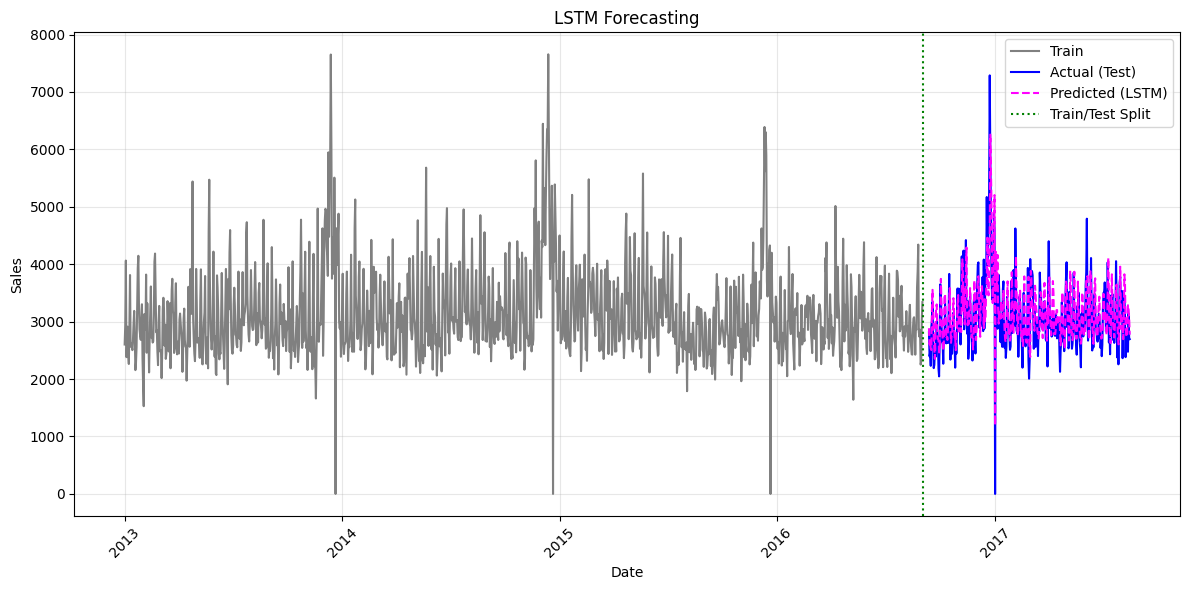

In [393]:
# 3. Visualisasi Train-Aktual-Prediksi

# Buat index tanggal untuk test set
test_dates = dates[-len(y_test_inv):]

# Menentukan Kanvas
plt.figure(figsize=(12,6))

# Melakukan Plot Data
plt.plot(dates[:len(y_train)], scaler.inverse_transform(y_train.reshape(-1, 1)),
         label='Train', color='gray')
plt.plot(test_dates, y_test_inv, label='Actual (Test)', color='blue')
plt.plot(test_dates, predictions_inv, label='Predicted (LSTM)', color='magenta', linestyle='--')
plt.axvline(x=dates[len(y_train)], color='green', linestyle=':', label='Train/Test Split')
plt.title('LSTM Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

# Menampilkan Visual Data
plt.tight_layout()
plt.show()

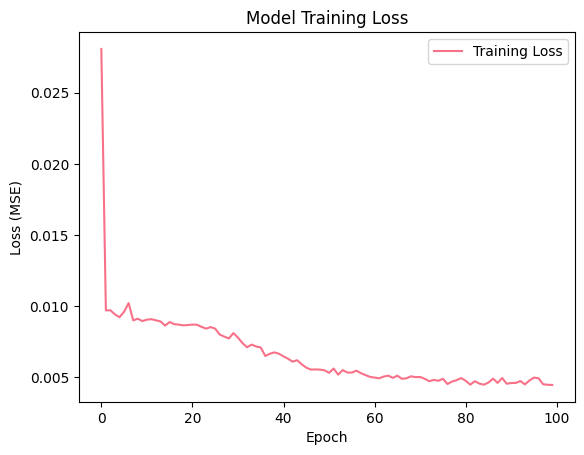

In [394]:
# 4. Visualisasi Loss

# Melakukan Plot Data
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')

# Menampilkan Visual Data
plt.legend()
plt.show()

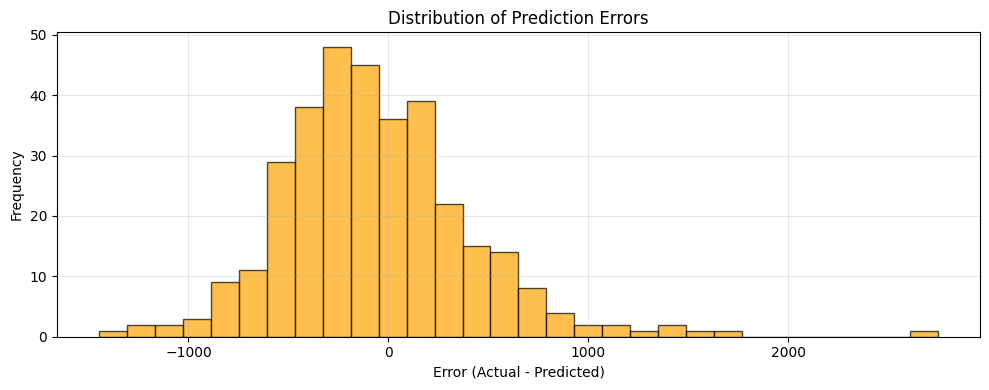

In [395]:
# 5. Visualisasi Error

# Mendefinisikan error
errors = y_test_masked - pred_masked

# Menentukan Kanvas
plt.figure(figsize=(10,4))

# Melakukan Plot Data
plt.hist(errors, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)

# Menampilkan Visual Data
plt.tight_layout()
plt.show()

In [396]:
# 6. Menampilkan Data Aktual, Prediksi, dan Error

# Mendefinisikan data
df_eval = pd.DataFrame({
    'Actual': y_test_masked.flatten(),
    'Predicted': pred_masked.flatten(),
    'Error': errors.flatten()
})

# Mencetak data
print("\n📋 Contoh 10 hasil prediksi pertama:")
print(df_eval.head(10))


📋 Contoh 10 hasil prediksi pertama:
   Actual    Predicted       Error
0  2815.0  2886.172852  -71.172852
1  2396.0  2604.587891 -208.587891
2  2463.0  2657.606934 -194.606934
3  2231.0  2526.527100 -295.527100
4  2909.0  2505.206543  403.793457
5  3018.0  3239.906006 -221.906006
6  3346.0  3553.941895 -207.941895
7  2678.0  3197.418457 -519.418457
8  2191.0  2744.977051 -553.977051
9  2248.0  2519.703857 -271.703857


### #2. SARIMAX

#### #1. Model Training

###### #a. Visualisasi Data

In [397]:
df_grocery_i

,id,store_nbr,family,sales,onpromotion,dcoilwtico,is_holiday_season,sales_scaled
date,,,,,,,,
2013-01-01,1464,5,GROCERY I,0.0,0,NaN,0,0.000000
2013-01-02,3246,5,GROCERY I,4558.0,0,93.14,0,0.595350
2013-01-03,5028,5,GROCERY I,3260.0,0,92.97,0,0.425810
2013-01-04,6810,5,GROCERY I,3085.0,0,93.12,0,0.402952
2013-01-05,8592,5,GROCERY I,3398.0,0,NaN,0,0.443835
...,...,...,...,...,...,...,...,...
2017-08-11,2993442,5,GROCERY I,2864.0,35,48.81,0,0.374086
2017-08-12,2995224,5,GROCERY I,2476.0,31,NaN,0,0.323406
2017-08-13,2997006,5,GROCERY I,3141.0,31,NaN,0,0.410266


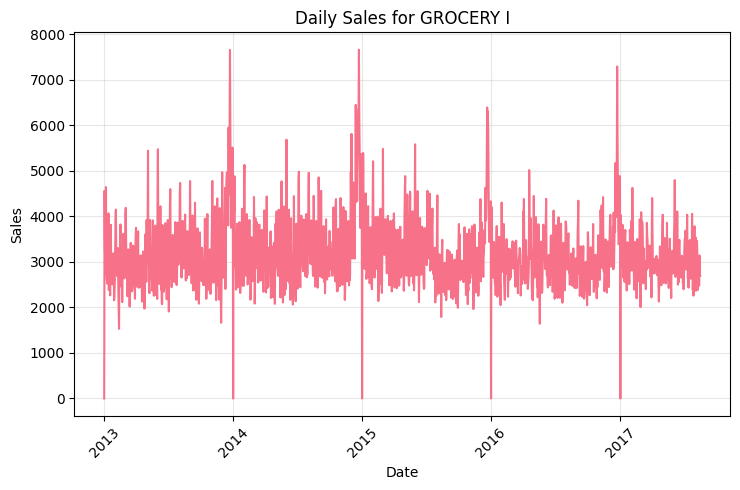

In [398]:
# 1. Persiapan Dataset

# 1.a Penanganan Data Awal
# Filter data untuk menampilkan kategori 'GROCERY I'
# Mendefinisikan dataframe untuk analisis
df_grocery_i = df[df["family"] == "GROCERY I"].copy()

if not isinstance(df_grocery_i.index, pd.DatetimeIndex):
    if 'date' in df_grocery_i.columns:
        df_grocery_i = df_grocery_i.set_index('date')
    df_grocery_i.index = pd.to_datetime(df_grocery_i.index)

df_grocery_i = df_grocery_i.sort_index()
dates = df_grocery_i.index


# 1.b Visualisasi Data Penjualan Kategori 'GROCERY I'

# Menentukan Kanvas
plt.figure(figsize=(7.5, 5))

# Melakukan Plot Data
plt.plot(df_grocery_i.index, df_grocery_i["sales"])
plt.title("Daily Sales for GROCERY I")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Menampilkan Visual Data
plt.tight_layout()
plt.show()

##### #b. Identifikasi Model: Mencari Order p, d, q

###### #b.1 Menentukan Differencing (d) dengan Cek Stasioneritas

In [399]:
# 2. Mengecek Stasioneritas Menggunakan ADF

from statsmodels.tsa.stattools import adfuller

# 2.a Pemodelan ADF
result = adfuller(df_grocery_i["sales"])

# 2.a Hasil Pemodelan ADF
print('Hasil Pemodelan ADF:')
print(' - ADF Statistic: %f' % result[0])
print(' - p-value: %f' % result[1])
print(' - Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


# 2.b Kesimpulan Pemodelan ADF
if result[1] <= 0.05:
    print(f"\nKesimpulan:")
    print(" - Data STASIONER (p-value <= 0.05)")
    print(" - Data siap digunakan untuk SARIMAX")
    print(" - Tidak perlu differencing")
else:
    print(f"\nKesimpulan:")
    print("Data TIDAK STASIONER (p-value > 0.05)")
    print("Butuh differencing untuk membuat data stasioner")


Hasil Pemodelan ADF:
 - ADF Statistic: -7.212414
 - p-value: 0.000000
 - Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568

Kesimpulan:
 - Data STASIONER (p-value <= 0.05)
 - Data siap digunakan untuk SARIMAX
 - Tidak perlu differencing


###### #b.2 Menentukan Autoregressive (p) dan Moving Average (q)

ADF Statistic: -7.212413879751168
p-value: 2.2171498146870515e-10
Critical Value 1%: -3.434
Critical Value 5%: -2.863
Critical Value 10%: -2.568

✅ Data stasioner — langsung gunakan series asli.


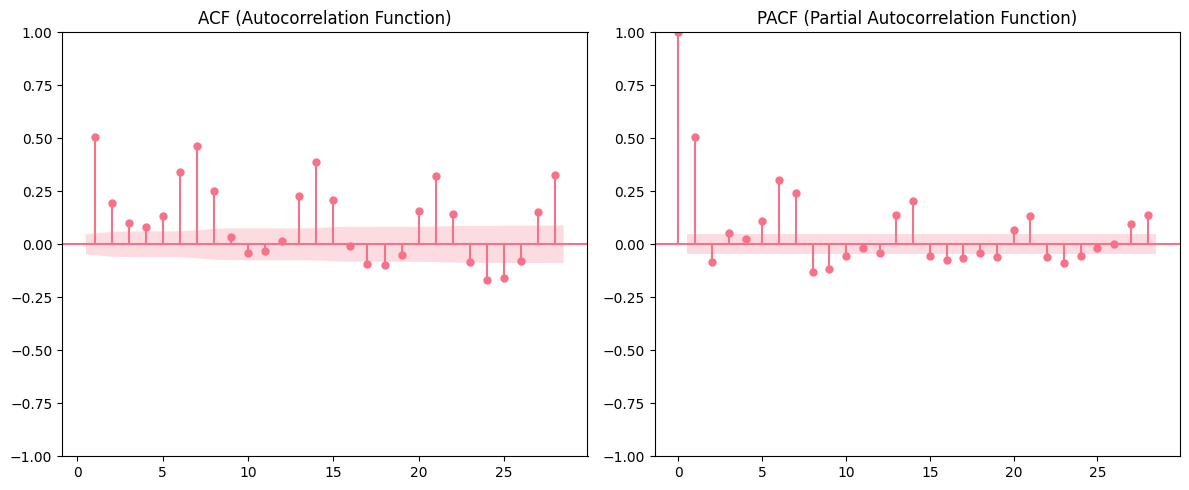

In [400]:
# Mengimport library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


# 1. Pastikan index datetime
if not isinstance(df_grocery_i.index, pd.DatetimeIndex):
    df_grocery_i = df_grocery_i.set_index('date')
df_grocery_i.index = pd.to_datetime(df_grocery_i.index)

# 2. Ambil series target
series = df_grocery_i['sales'].dropna()

# 3. Tes stasioneritas pakai ADF
adf_result = adfuller(series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value {key}: {value:.3f}")

# 4. Bikin series yang stasioner buat plot ACF/PACF
if adf_result[1] > 0.05:
    print("\n❌ Data tidak stasioner — akan gunakan first difference untuk ACF/PACF.")
    series_diff = series.diff().dropna()
else:
    print("\n✅ Data stasioner — langsung gunakan series asli.")
    series_diff = series

# 5. Plot ACF & PACF
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_acf(series_diff, lags=28, ax=plt.gca(), zero=False)
plt.title('ACF (Autocorrelation Function)')

plt.subplot(1,2,2)
plot_pacf(series_diff, lags=28, ax=plt.gca(), method='ywm')
plt.title('PACF (Partial Autocorrelation Function)')

plt.tight_layout()
plt.show()

###### #b.3 Orde yang Digunakan

**Orde: (1, 1, 1)**

1. Autoregressive Order p = 1

* Dari PACF, terlihat cut off tajam setalah lag-1, yang berarti pengaruh masa lalu hanya kuat di 1 periode sembelumnya (AR(1))

2. Differencing Order d = 1
* Karena data belum sepenuhnya stasioner (masih ada tren), jika dilakukan differencing 1x agar varian dan mean jadi stabil

3. Moving Average Order q = 1
Dari ACF plot, terlihat lag-1 signifikan dan mulai turun setelahnya, menandakan efek MA(1) cukup kuat



**Seasonal: (1, 1, 1, 12)**

1. Seasonal AR(1) P = 1
* Ada pola berulang antar musim/periode (misal tiap tahun/bulan), artinya nilai bulan ini dipengaruhi oleh nilai 12 bulan lalu

2. Seasonal Differencing D=1
* Untuk menghilangkan pola musiman, dilakukan differencing 1x setiap 12 periode

3. Seasonanl MA(1) Q=1
* Error atau gangguan dari periode musiman sebelumnya juga memengaruhi nilai saat ini

4. Seasonal Period=12 s=12
* Karena datanya bulanan, jadi 1 siklus musiman 12 bulan

##### #c. Membuat Model

In [401]:
# 1. Menentukan Exogonus

# Menentukan Kolom Exogenus
exog_cols = ["onpromotion", "dcoilwtico"]

# Menentukan Kolom 'date' menjadi index
if not isinstance(df_grocery_i.index, pd.DatetimeIndex):
    df_grocery_i = df_grocery_i.set_index("date")

# Menambhakan Kolom 'is_holiday_season'
df_grocery_i["is_holiday_season"] = df_grocery_i.index.month.isin([11, 12]).astype(int)

# Mengupdate Kolom Exogenus
exog_cols.append('is_holiday_season')

# Mengecek Kolom Exogonus yang Sudah Ditambahkan
print(f"Exogenous variables: {exog_cols}")

Exogenous variables: ['onpromotion', 'dcoilwtico', 'is_holiday_season']


In [402]:
# 2. Melakukan Slicing Data

# Menentukan Train Size dan Test Size
train_size = int(len(df_grocery_i) * 0.8)
train = df_grocery_i.iloc[:train_size]
test = df_grocery_i.iloc[train_size:]

# Memisahkan Target dan Fitur Exogenous
y_train = train['sales']
X_train = train[exog_cols]
y_test = test['sales']
X_test = test[exog_cols]

# Mengubah 'y_train' dan 'y_test' menjadi DataFrame
y_train_df = y_train.to_frame()
y_test_df = y_test.to_frame()

# Memvefikasi Tipe Data sudah DataFrame/Belum
print("Tipe data y_train_df:", type(y_train_df))
print("Tipe data y_test_df:", type(y_test_df))

# Menampilkan Sampel Data dari DataFrame Baru
print("\nHead of y_train_df:")
print(y_train_df.head())

print("\nHead of y_test_df:")
print(y_test_df.head())



Tipe data y_train_df: <class 'pandas.core.frame.DataFrame'>
Tipe data y_test_df: <class 'pandas.core.frame.DataFrame'>

Head of y_train_df:
             sales
date              
2013-01-01     0.0
2013-01-02  4558.0
2013-01-03  3260.0
2013-01-04  3085.0
2013-01-05  3398.0

Head of y_test_df:
             sales
date              
2016-09-12  2815.0
2016-09-13  2396.0
2016-09-14  2463.0
2016-09-15  2231.0
2016-09-16  2909.0


In [403]:
# 3. Melakukan Pemodelan SARIMAX

import statsmodels.api as sm

# Menanganan Missing Values di Variabel Exogenus Sebelum Dipakai pada Model
X_train["dcoilwtico"].fillna(method="ffill", inplace=True)
X_train["dcoilwtico"].fillna(method="bfill", inplace=True)
X_test["dcoilwtico"].fillna(method="ffill", inplace=True)
X_test["dcoilwtico"].fillna(method="bfill", inplace=True)

# Memodelkan SARIMAX
model = sm.tsa.statespace.SARIMAX(
    y_train_df,
    exog = X_train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result = model.fit()

# Mencetak Hasil Pemodelan SARIMAX
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                 1347
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -10445.932
Date:                            Tue, 21 Oct 2025   AIC                          20907.864
Time:                                    16:45:48   BIC                          20949.347
Sample:                                         0   HQIC                         20923.416
                                           - 1347                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
onpromotion          -4.6193      3.022     -1.528      0.126     -10.543       1.304
dcoilwtico    

In [404]:
# 4. Prediksi Model SARIMAX pada Periode Data Uji

predictions = result.get_forecast(steps=len(y_test_df), exog=X_test)
pred_mean = predictions.predicted_mean
pred_mean.index = y_test_df.index
pred_mean

,predicted_mean
date,
2016-09-12,3208.609430
2016-09-13,3203.324819
2016-09-14,3052.984562
2016-09-15,2878.295274
2016-09-16,2959.047912
...,...
2017-08-11,3277.339570
2017-08-12,3222.974407
2017-08-13,3280.959618


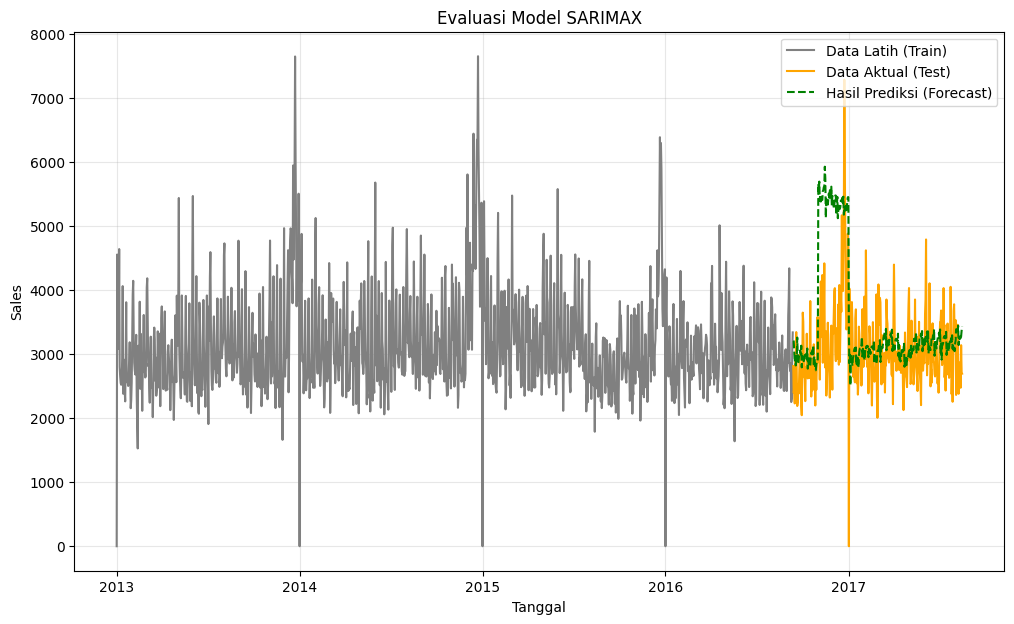

In [405]:
# 5. Visualisasi Prediksi Model SARIMAX pada Periode Data Uji

# Menentukan Kanvas
plt.figure(figsize=(12, 7))

# Melakukan Plot Data Train
plt.plot(y_train_df.index, y_train_df, label='Data Latih (Train)', color='gray')

# Melakukan Data Test (Data Aktual)
plt.plot(y_test_df.index, y_test_df, label='Data Aktual (Test)', color='orange')

# Melakukan Plot Data Hasil Prediksi
plt.plot(pred_mean.index, pred_mean, label='Hasil Prediksi (Forecast)', color='green', linestyle='--')

# Melakkan Penyesuaian Visualisasi
plt.title('Evaluasi Model SARIMAX')
plt.xlabel('Tanggal')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)

# Menampilksan Visual Data
plt.show()


#### #2. Model Evaluation

##### #a. SARIMAX: Membuat Prediksi

In [406]:
# 1. Prediksi Model
# 1.a Membuat Model Predict
predictions_scaled = result.predict(
    start=len(y_train),
    end=len(y_train) + len(y_test) - 1,
    exog=X_test
)


# 1.b Membuat Model Inverse Scale Untuk Nilai Aktual
actual = scaler.inverse_transform(y_test.to_numpy().reshape(-1, 1))

predictions = scaler.inverse_transform(predictions_scaled.to_numpy().reshape(-1, 1))

# 1.c Cek alignment data
print("Pengecekan Alignment Data:")
print(f"Shape 'actual': {actual.shape}, Shape 'predictions': {predictions.shape}")
print("- 5 Data Pertama untuk 'actual':", actual[:5].flatten())
print("- 5 Data Pertama untuk 'predictions':", predictions[:5].flatten())



Pengecekan Alignment Data:
Shape 'actual': (337, 1), Shape 'predictions': (337, 1)
- 5 Data Pertama untuk 'actual': [21551640. 18343776. 18856728. 17080536. 22271304.]
- 5 Data Pertama untuk 'predictions': [24565113.79379004 24524654.81634305 23373649.80353943 22036228.62008735
 22654470.81464783]


In [407]:
# Mencetak Data Aktual dan Prediksi
print(actual[:10])
print(predictions[:10].flatten())

[[21551640.]
 [18343776.]
 [18856728.]
 [17080536.]
 [22271304.]
 [23105808.]
 [25616976.]
 [20502768.]
 [16774296.]
 [17210688.]]
[24565113.79379004 24524654.81634305 23373649.80353943 22036228.62008735
 22654470.81464783 21624710.16738804 22774940.93539162 22270032.54372142
 24963955.44670817 22472166.63177266]


##### #b. SARIMAX: Membuat Evaluasi

In [408]:
# 1. Melakukan Evaluasi Model

# Mengimport Library
from sklearn.metrics import mean_squared_error
import numpy as np

# Mendefinisikan Actual dan Predictions (sudah numpy array)
y_true = actual
y_pred = predictions

# Penangnan Untuk Menghindari Pembagian dengan Nol
epsilon = 1e-8
mask = y_true != 0
y_true_safe = y_true[mask]
y_pred_safe = y_pred[mask]

# Melakukan Evaluasi Metrik
mse = mean_squared_error(y_true_safe, y_pred_safe)
mape = np.mean(np.abs((y_true_safe - y_pred_safe) / y_true_safe)) * 100
smape = np.mean(2 * np.abs(y_pred_safe - y_true_safe) / (np.abs(y_pred_safe) + np.abs(y_true_safe) + epsilon)) * 100

# Menampilkan Hasil Evaluasi
print(f"📊 Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")

📊 Model Evaluation:
Mean Squared Error (MSE): 57428537360647.66
MAPE: 22.93%
SMAPE: 19.48%


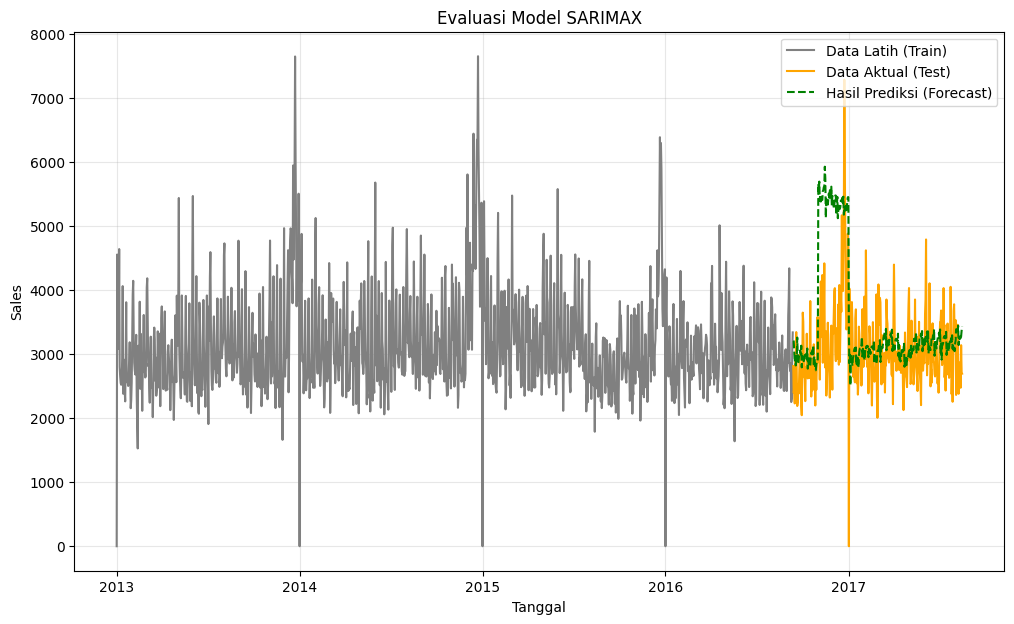

In [409]:
# 5. Visualisasi Prediksi Model SARIMAX pada Periode Data Uji

# Menentukan Kanvas
plt.figure(figsize=(12, 7))

# Melakukan Plot Data Train
plt.plot(y_train_df.index, y_train_df, label='Data Latih (Train)', color='gray')

# Melakukan Data Test (Data Aktual)
plt.plot(y_test_df.index, y_test_df, label='Data Aktual (Test)', color='orange')

# Melakukan Plot Data Hasil Prediksi
plt.plot(pred_mean.index, pred_mean, label='Hasil Prediksi (Forecast)', color='green', linestyle='--')

# Melakkan Penyesuaian Visualisasi
plt.title('Evaluasi Model SARIMAX')
plt.xlabel('Tanggal')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)

# Menampilksan Visual Data
plt.show()


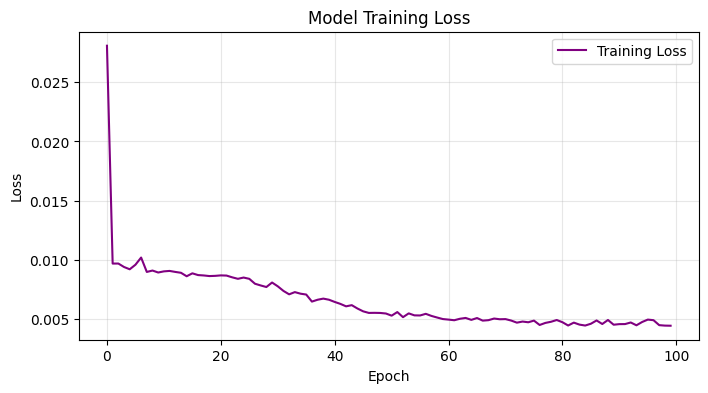

In [410]:
# 4. Visualisasi Loss

# Menentukan Kanvas
plt.figure(figsize=(8, 4))

# Melakukan Plot Data
plt.plot(history.history['loss'], label='Training Loss', color='purple')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

# Menampilkan Visual Data
plt.show()